# Initialize

In [1]:
#%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"
%cd "/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics"

/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_unimodal import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-23 12:59:08.760480: Importing os...
2024-04-23 12:59:08.760674: Importing sys...
Visible devices: [0]
2024-04-23 12:59:08.761089: Importing timer from timeit...
2024-04-23 12:59:08.761177: Setting env variables for tf import (only device(s) [0] will be available)...
2024-04-23 12:59:08.761338: Importing numpy...
2024-04-23 12:59:08.863209: Importing matplotlib...
2024-04-23 12:59:09.223526: Importing h5py...
2024-04-23 12:59:09.243035: Importing importlib.util...
2024-04-23 12:59:09.243132: Importing json...
2024-04-23 12:59:09.243195: Importing pandas...
2024-04-23 12:59:09.547657: Importing random...
2024-04-23 12:59:09.547796: Importing scipy utils...
2024-04-23 12:59:09.891329: Importing subprocess...
2024-04-23 12:59:09.891450: Importing tensorflow...


Tensorflow version: 2.12.0
2024-04-23 12:59:11.410684: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-23 12:59:11.586797: Importing timeit...
2024-04-23 12:59:11.586866: Importing tqdm...
2024-04-23 12:59:11.588938: Importing typing...
2024-04-23 12:59:11.589014: Setting tf configs...
2024-04-23 12:59:11.721599: Importing GMetrics module...
2024-04-23 12:59:14.104052: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A40
Loaded 1 GPUs: ['NVIDIA A40']
Model directory exists
2024-04-23 12:59:14.149830: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = 0.,
                                                             eps_scale = 0.,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
dist_2 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = eps_loc,
                                                             eps_scale = eps_scale,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


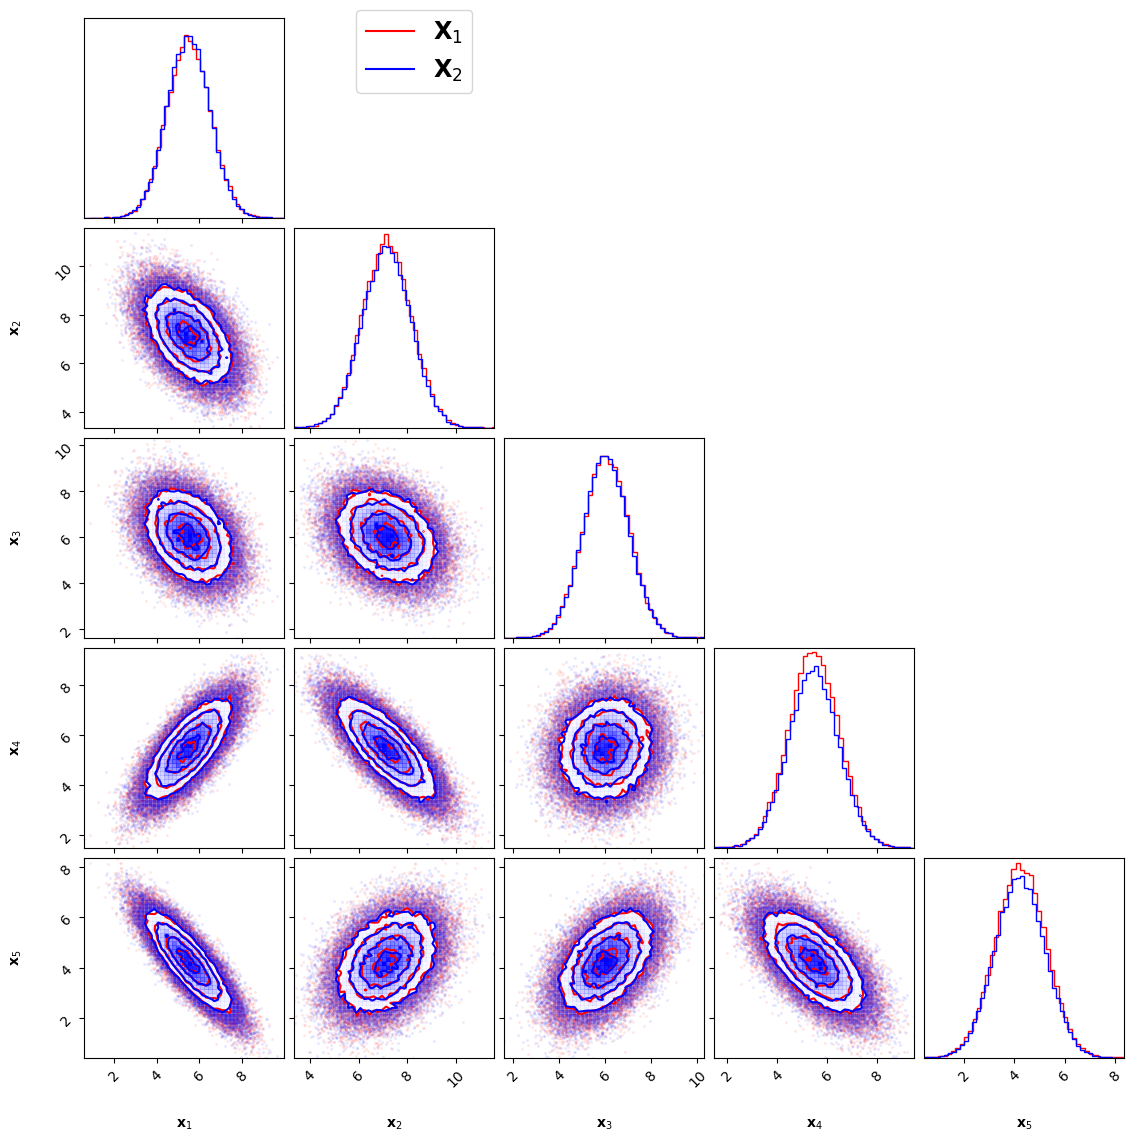

In [17]:
cornerplotter(dist_1 = dist_1, 
              dist_2 = dist_2, 
              path_to_plots = results_dir, 
              figure_name = "corner_plot.png",
              max_points = 50_000,
              max_dim = 32,
              n_bins = 50,
              show = True,
              save = True)

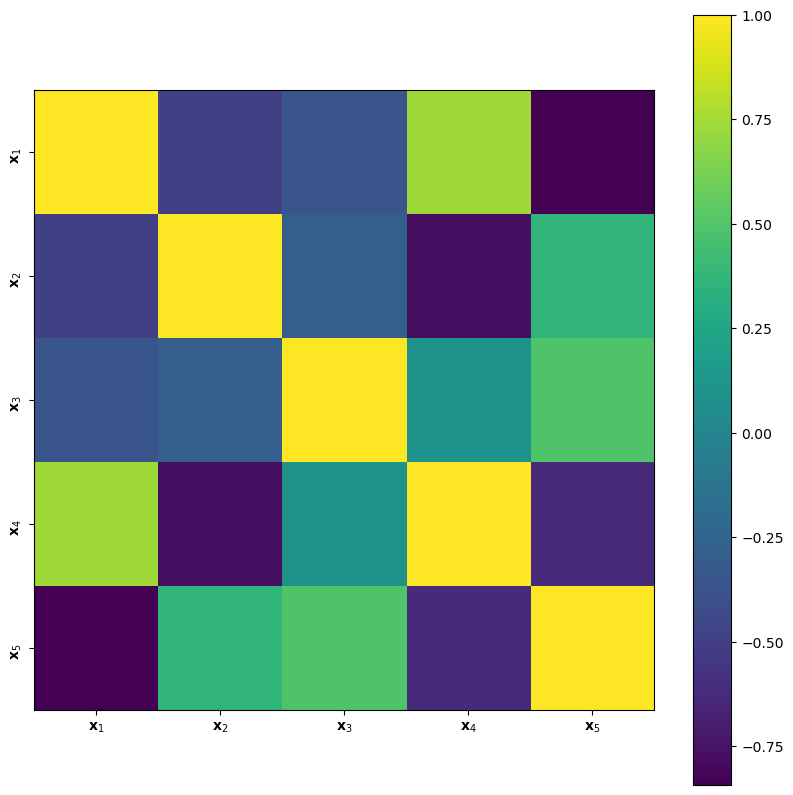

In [18]:
plot_corr_matrix(dist = dist_1,
                 path_to_plots = results_dir,
                 figure_name = "corre_matrix_plot.pdf",
                 max_points = 1_000_000,
                 show_labels = True,
                 show = True,
                 save = True)

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 10_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 10_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            10000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  100000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 5000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10_000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10_000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1_000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1_000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 5000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results/5D_unimodal/5D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_ke

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results/5D_unimodal/5D_10K/null_hypothesis/FN.json
Loading fpd from results/5D_unimodal/5D_10K/null_hypothesis/FPD.json
Loading kpd from results/5D_unimodal/5D_10K/null_hypothesis/KPD.json
Loading ks from results/5D_unimodal/5D_10K/null_hypothesis/KS.json
Loading sks from results/5D_unimodal/5D_10K/null_hypothesis/SKS.json
Loading swd from results/5D_unimodal/5D_10K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7007808891363962], [0.95, [9500, 500], 1.06788877479979], [0.99, [9900, 100], 1.3034783196639617]]
Computing time for metric fn: 7.024550637928769
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.7678326687656184], [0.95, [9500, 500], 0.9616832309404841], [0.99, [9900, 100], 1.1205748653553012]]
Computing time for metric fpd: 98.15293599106371
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.010553086154718727], [0.95, [9500, 500], 0.23967625638787737], [0.99, [9900, 100], 0.2804060943559783]]
Computing time for metric kpd: 2083.2103196540847
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9178247550574925], [0.95, [9500, 500], 1.1455146747678953], [0.99, [9900, 100], 1.28834907996586]]
Computing time for metric ks: 26.685080379946157
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9071474963608753], [0.95, [9500, 500], 1.0883793400844244], [0.99, [9900, 100], 1.198475667036836]]
Computing time for metric sks: 324.892257089959

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f2598831990>   
1          metric_list  <function <lambda> at 0x7f2598832950>   
2          metric_list  <function <lambda> at 0x7f25988329e0>   
3      statistic_means  <function <lambda> at 0x7f2598832a70>   
4         metric_means  <function <lambda> at 0x7f2598832b00>   
5         metric_means  <function <lambda> at 0x7f2598832b90>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f2598832c20>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1             lambda ns, ndims: 10_000   
2              lambda ns, ndims: 1_000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           5000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...             10   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...           2000   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_10K/null_hypothesis/FN....   
1  results/5D_unimodal/5D_10K/null_hypothesis/FPD...   
2  results/5D_unimodal/5D_10K/null_hypothesis/KPD...   
3  results/5D_unimodal/5D_10K/null_hypothesis/KS....   
4  results/5D_unimodal/5D_10K/null_hypothesis/SKS...   
5  results/5D_unimodal/5D_10K/null_hypothesis/SWD...   
6  results/5D_unimodal/5D_10K/null_hypothesis/LR....   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.7007808891363962], [0....  
1  [[0.68, [6800, 3199], 0.7678326687656184], [0....  
2  [[0.68, [6800, 3199], -0.010553086154718727], ...  
3  [[0.68, [6800, 3199], 0.9178247550574925], [0....  
4  [[0.68, [6800, 3199], 0.9071474963608753], [0....  
5  [[0.68, [6800, 3199], 0.574625686189055], [0.9...  
6                                                 []

### Plots of null-distributions

mu = 0.609703283313111 +/- 0.0006067023625395784
sigma = 0.2463132888294049 +/- 0.0019366981053443907
68%CL = 0.7007808891363962, 95%CL = 1.06788877479979, 99%CL = 1.3034783196639617


/tmp/ipykernel_33578/1922955610.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1922955610.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1922955610.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1922955610.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


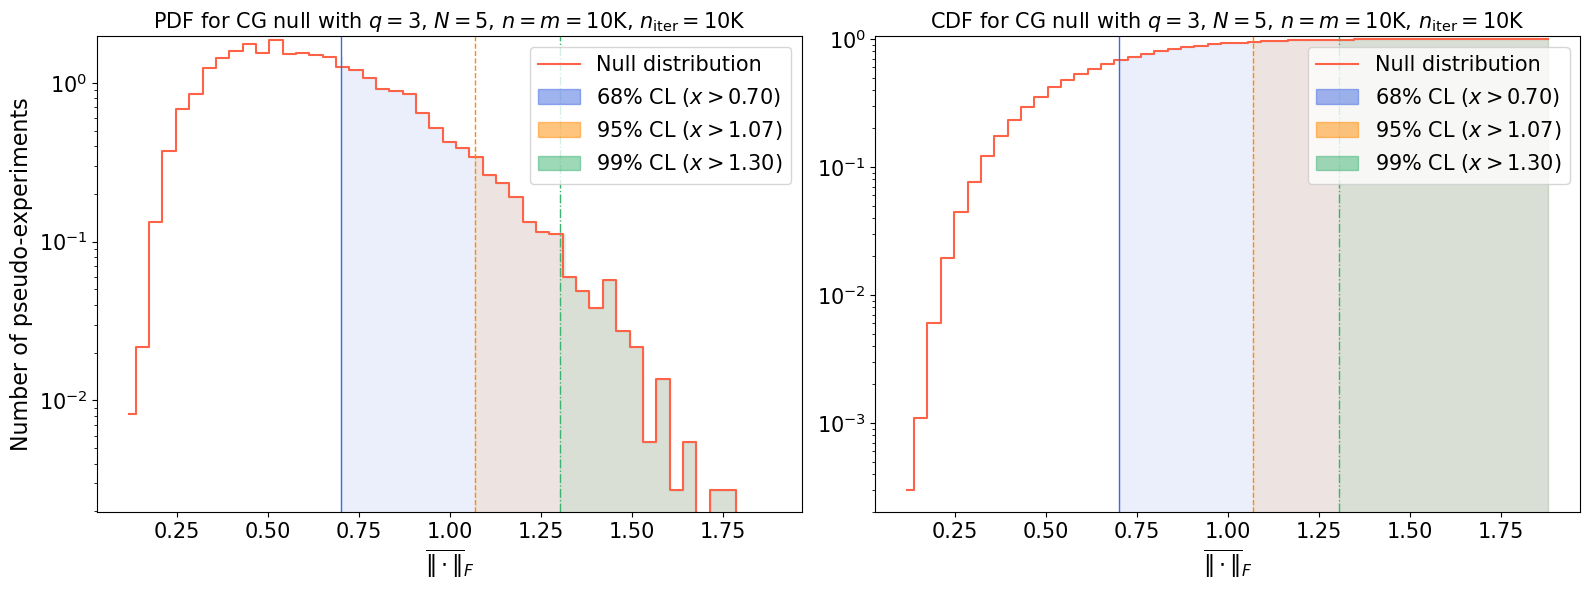

Time elapsed: 0.9221475708764046 seconds.
mu = 0.7467424469819841 +/- 0.00011927720876467752
sigma = 0.10921410566619932 +/- 0.0014521936881749927
68%CL = 0.7678326687656184, 95%CL = 0.9616832309404841, 99%CL = 1.1205748653553012


/tmp/ipykernel_33578/1922955610.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1922955610.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1922955610.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1922955610.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


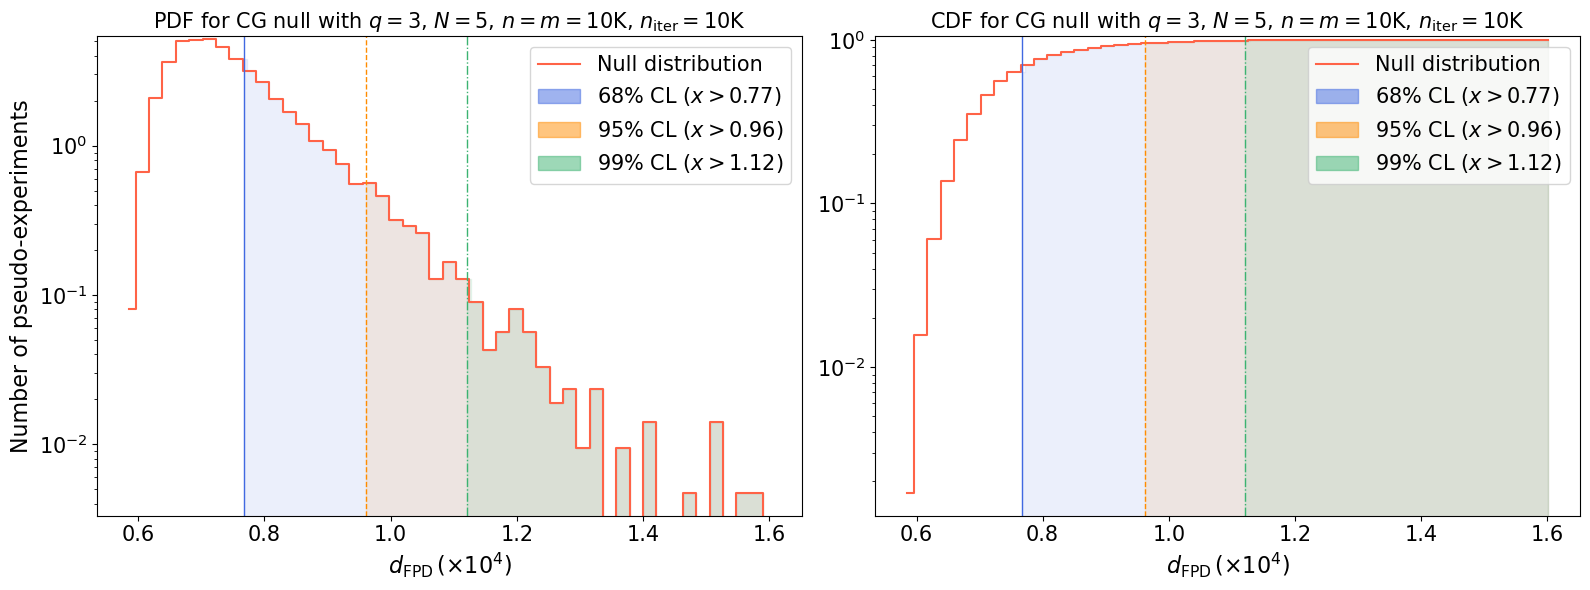

Time elapsed: 0.8813812860753387 seconds.
mu = 0.004791194070284943 +/- 0.00010102366120418836
sigma = 0.10051052741090774 +/- 0.0008504647814645767
68%CL = -0.010553086154718727, 95%CL = 0.23967625638787737, 99%CL = 0.2804060943559783


/tmp/ipykernel_33578/1922955610.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1922955610.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1922955610.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1922955610.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


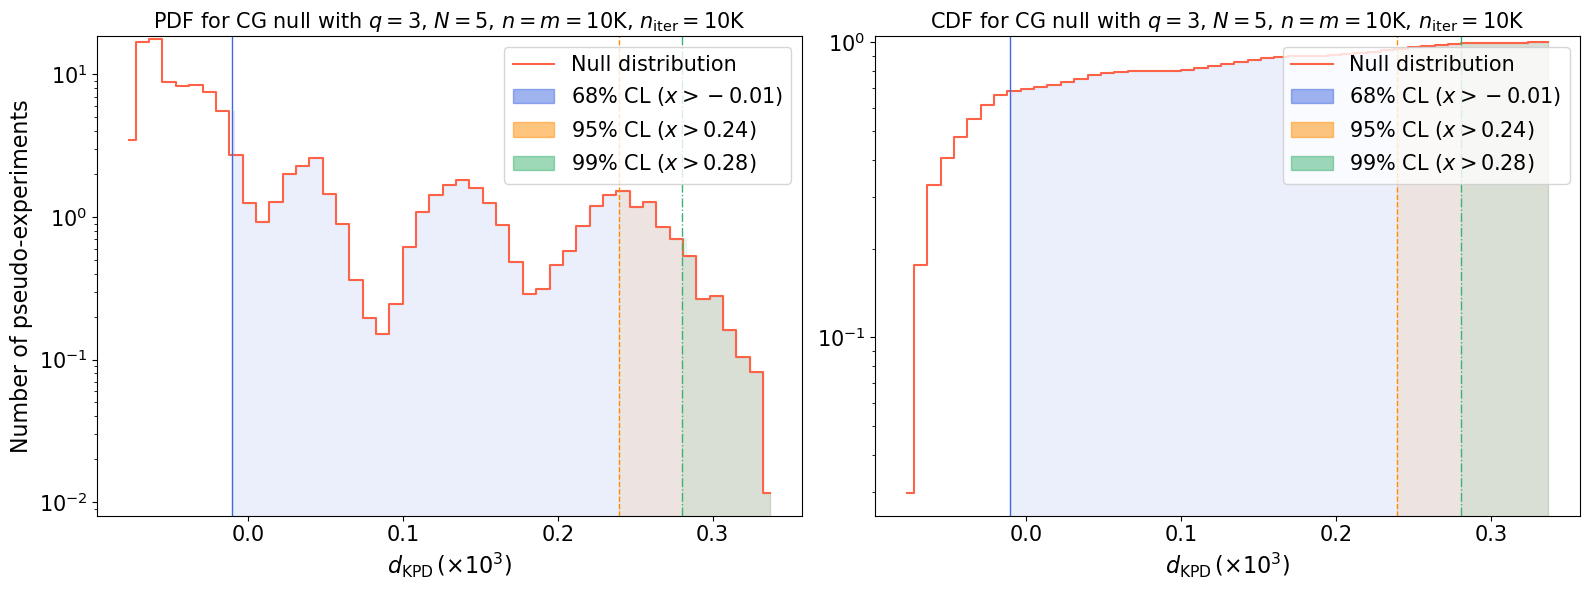

Time elapsed: 0.8366782511584461 seconds.
mu = 0.8644193154754841 +/- 0.00023053631024838052
sigma = 0.15183422217944825 +/- 0.0012345935148357135
68%CL = 0.9178247550574925, 95%CL = 1.1455146747678953, 99%CL = 1.28834907996586


/tmp/ipykernel_33578/1922955610.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1922955610.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1922955610.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1922955610.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


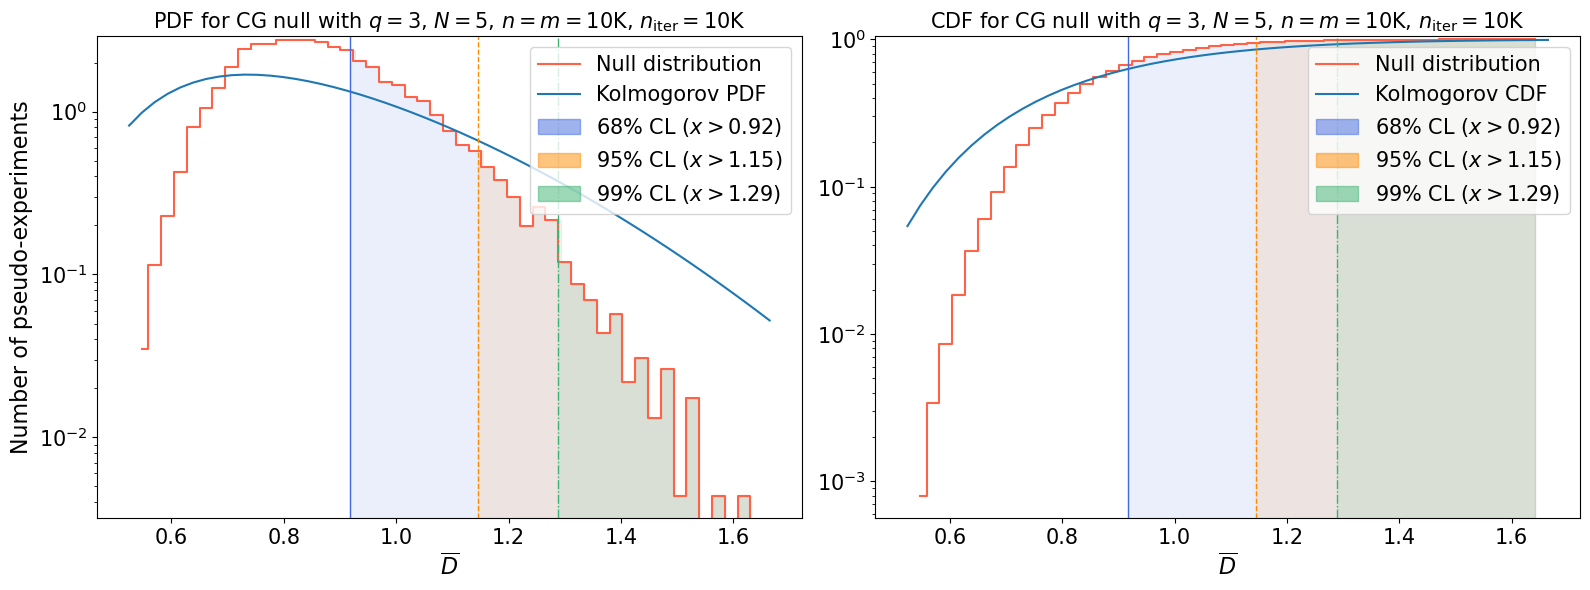

Time elapsed: 1.2240221300162375 seconds.
mu = 0.8653553242156943 +/- 0.00014368295196135687
sigma = 0.11986782385667842 +/- 0.0009619110349003553
68%CL = 0.9071474963608753, 95%CL = 1.0883793400844244, 99%CL = 1.198475667036836


/tmp/ipykernel_33578/1922955610.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1922955610.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1922955610.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1922955610.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


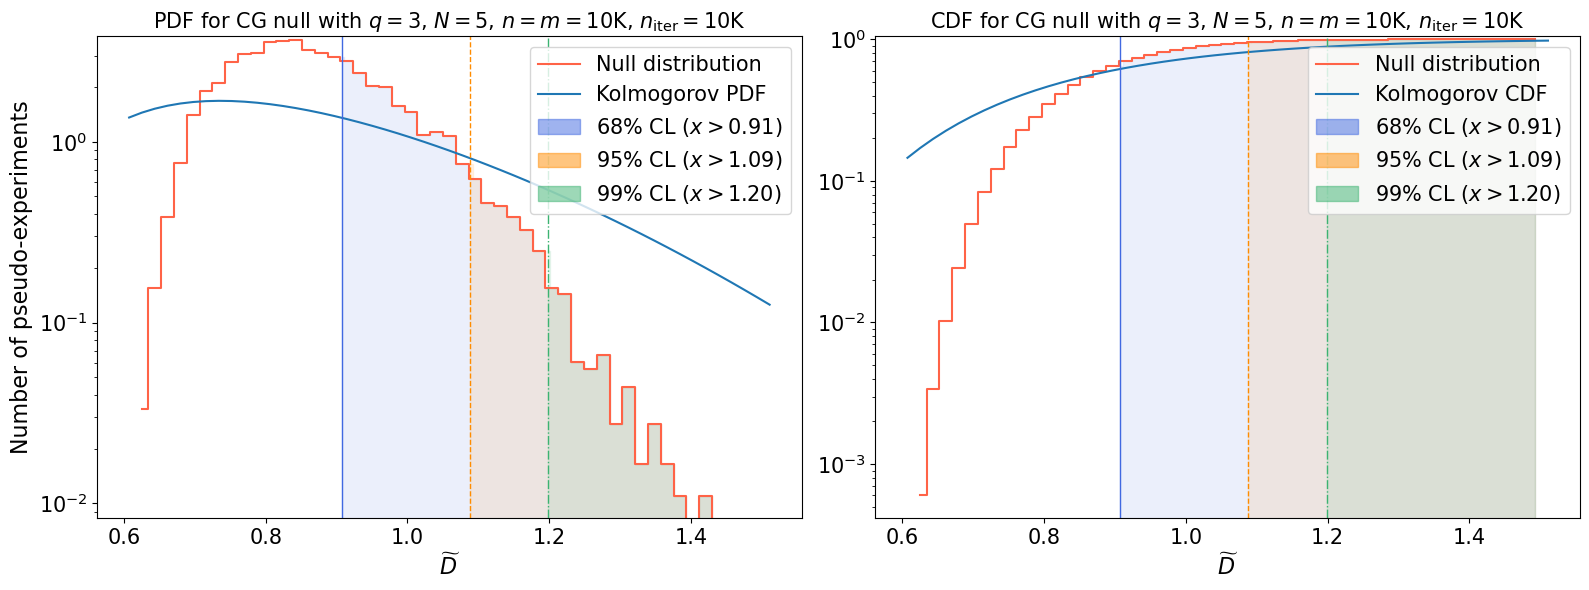

Time elapsed: 1.2280355151742697 seconds.
mu = 0.5419254684933534 +/- 0.00011437576882371476
sigma = 0.10694660762441918 +/- 0.000991666744047594
68%CL = 0.574625686189055, 95%CL = 0.7442173555967321, 99%CL = 0.867524479089845


/tmp/ipykernel_33578/1922955610.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1922955610.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1922955610.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1922955610.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


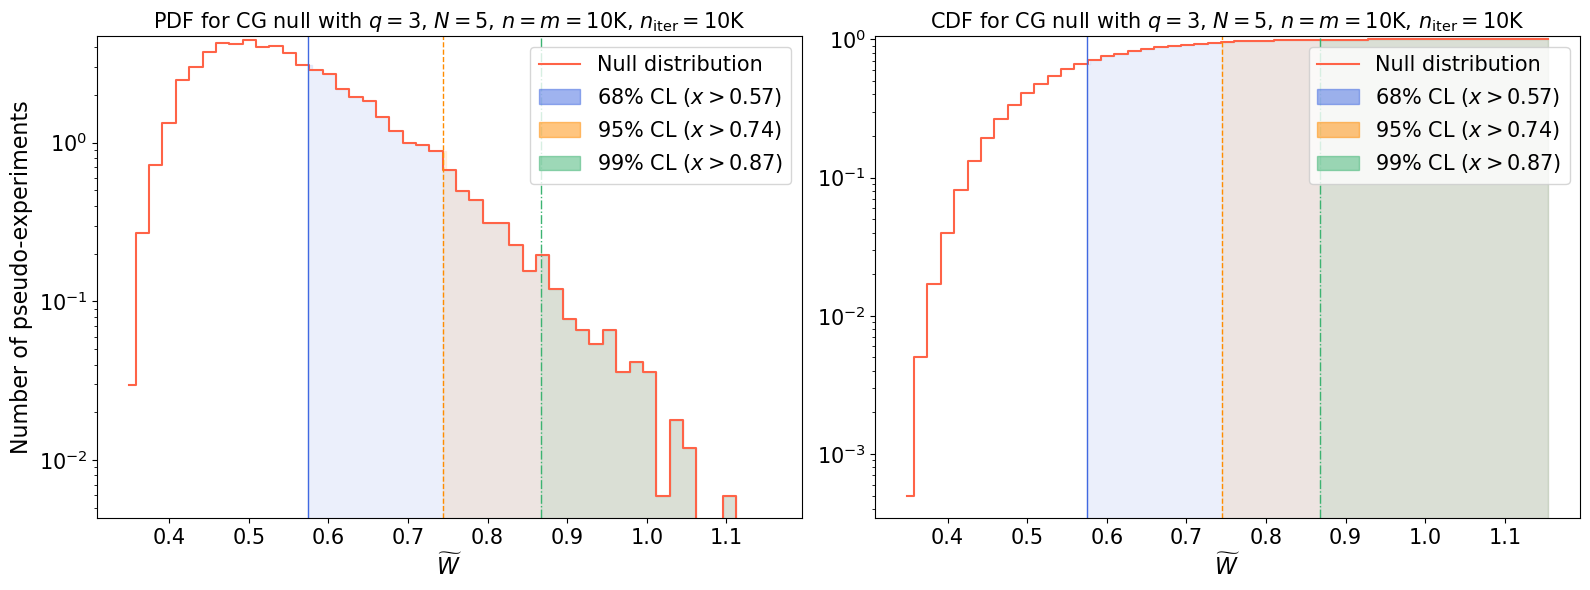

Time elapsed: 0.9276541131548584 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f8714196680>   
1          metric_list  <function <lambda> at 0x7f87140f5bd0>   
2          metric_list  <function <lambda> at 0x7f87140f5c60>   
3      statistic_means  <function <lambda> at 0x7f87140f5cf0>   
4         metric_means  <function <lambda> at 0x7f87140f5d80>   
5         metric_means  <function <lambda> at 0x7f87140f5e10>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f87140f5ea0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1             lambda ns, ndims: 10_000   
2              lambda ns, ndims: 1_000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           5000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...             10   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
6  {'niter': 10000, 'batch_size_test': 10000, 'ba...           2000   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_10K/null_hypothesis/FN....   
1  results/5D_unimodal/5D_10K/null_hypothesis/FPD...   
2  results/5D_unimodal/5D_10K/null_hypothesis/KPD...   
3  results/5D_unimodal/5D_10K/null_hypothesis/KS....   
4  results/5D_unimodal/5D_10K/null_hypothesis/SKS...   
5  results/5D_unimodal/5D_10K/null_hypothesis/SWD...   
6  results/5D_unimodal/5D_10K/null_hypothesis/LR....   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.7007808891363962], [0....   
1  [[0.68, [6800, 3199], 0.7678326687656184], [0....   
2  [[0.68, [6800, 3199], -0.010553086154718727], ...   
3  [[0.68, [6800, 3199], 0.9178247550574925], [0....   
4  [[0.68, [6800, 3199], 0.9071474963608753], [0....   
5  [[0.68, [6800, 3199], 0.574625686189055], [0.9...   
6                                                 []   

                                         null_figure  
0  results/5D_unimodal/5D_10K/null_hypothesis/FN.pdf  
1  results/5D_unimodal/5D_10K/null_hypothesis/FPD...  
2  results/5D_unimodal/5D_10K/null_hypothesis/KPD...  
3  results/5D_unimodal/5D_10K/null_hypothesis/KS.pdf  
4  results/5D_unimodal/5D_10K/null_hypothesis/SKS...  
5  results/5D_unimodal/5D_10K/null_hypothesis/SWD...  
6                                                NaN

In [27]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{4})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{3})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for CG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for CG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 20,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with off deformation already loaded.
Exclusion limits for fn with cov deformation already loaded.
Exclusion limits for fn with mean_std deformation already loaded.
Exclusion limits for fn with mean_off deformation already loaded.
Exclusion limits for fn with mean_cov deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with off deformation already loaded.
Exclusion limits for fpd with cov deformation already loaded.
Exclusion limits for fpd with mean_std deformation already loaded.
Exclusion limits for fpd with mean_off deformation already loaded.
Exclusion limits for fpd with mean_cov deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformatio

Computing (Tensor("while/Placeholder:0", shape=(), dtype=int32),Tensor("while/while/Placeholder:0", shape=(), dtype=int32)) component
statistic = 1.2784630755516613 - next threshold = 0.23967625638787737 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.3684999753437053

------------ 2 ------------
eps = 5.0
statistic = 0.25995501566100643 - next threshold = 0.23967625638787737 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 0.08117490000163555

------------ 3 ------------
eps = 2.5
statistic = 0.05104441518297698 - next threshold = 0.23967625638787737 at 0.95 CL
relative_error_eps = 0.6666666666666666
relative_error_metric = 1.2976844074118554

------------ 4 ------------
eps = 3.75
statistic = 0.13054302445705268 - next threshold = 0.23967625638787737 at 0.95 CL
relative_error_eps = 0.2857142857142857
relative_error_metric = 0.5895599585292058

------------ 5 ------------
eps = 4.375
statistic = 0.18901105739783652 - next threshold = 0.23967625638787737 at 0.9

### Likelihood-ratio test

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [16]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.1,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with off deformation already loaded.
Exclusion limits for LR with cov deformation already loaded.
Exclusion limits for LR with mean_std deformation already loaded.
Exclusion limits for LR with mean_off deformation already loaded.
Exclusion limits for LR with mean_cov deformation already loaded.
dict_keys(['2024-04-16T10:13:01.851492', '2024-04-16T10:14:14.991746', '2024-04-23T10:45:41.644162', '2024-04-16T10:16:52.894774', '2024-04-16T10:17:57.894955', '2024-04-23T10:47:42.971716', '2024-04-16T10:20:37.378735', '2024-04-16T10:21:53.535152', '2024-04-16T10:23:58.388759', '2024-04-23T10:49:34.568764', '2024-04-16T10:28:35.311527', '2024-04-16T10:30:47.827954', '2024-04-23T10:53:32.673574', '2024-04-16T10:35:44.669023', '2024-04-16T10:38:07.946495', '2024-04-16T10:40:00.891734', '2024-04-23T12:54:50.902836', '2024-04-16T10:42:22.522640', '2024-

### Show and save results

In [17]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [18]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_off = results_df[results_df["Deformation"] == "off"]
results_df_cov = results_df[results_df["Deformation"] == "cov"]
results_df_mean_std = results_df[results_df["Deformation"] == "mean_std"]
results_df_mean_off = results_df[results_df["Deformation"] == "mean_off"]
results_df_mean_cov = results_df[results_df["Deformation"] == "mean_cov"]

In [19]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
42        lr        mean    5  10000                10000   
35       swd        mean    5  10000                10000   
28       sks        mean    5  10000                10000   
7        fpd        mean    5  10000                10000   
21        ks        mean    5  10000                10000   
0         fn        mean    5  10000                10000   
14       kpd        mean    5  10000                10000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
42                             0.01040                             0.01377   
35                             0.02953                             0.03999   
28                             0.03067                             0.04022   
7                              0.03464                             0.05146   
21                             0.04257                             0.05543   
0                              0.05600                             0.07260   
14                             0.38940                             0.41755   

    $t^{\mu}$ (s)  
42            329  
35            128  
28            200  
7             124  
21            124  
0              73  
14            112

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
42        lr                             0.01040   
35       swd                             0.02953   
28       sks                             0.03067   
7        fpd                             0.03464   
21        ks                             0.04257   
0         fn                             0.05600   
14       kpd                             0.38940   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
42                             0.01377            329  
35                             0.03999            128  
28                             0.04022            200  
7                              0.05146            124  
21                             0.05543            124  
0                              0.07260             73  
14                             0.41755            112

In [20]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
43        lr         std    5  10000                10000   
8        fpd         std    5  10000                10000   
36       swd         std    5  10000                10000   
29       sks         std    5  10000                10000   
1         fn         std    5  10000                10000   
22        ks         std    5  10000                10000   
15       kpd         std    5  10000                10000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
43                                0.00184   
8                                 0.02144   
36                                0.03220   
29                                0.03372   
1                                 0.03403   
22                                0.06683   
15                                3.97461   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
43                                0.00274               413  
8                                 0.03192               133  
36                                0.04417               129  
29                                0.04539               203  
1                                 0.04357                75  
22                                0.08701               117  
15                                4.28703                72

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
43        lr                                0.00184   
8        fpd                                0.02144   
36       swd                                0.03220   
29       sks                                0.03372   
1         fn                                0.03403   
22        ks                                0.06683   
15       kpd                                3.97461   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
43                                0.00274               413  
8                                 0.03192               133  
36                                0.04417               129  
29                                0.04539               203  
1                                 0.04357                75  
22                                0.08701               117  
15                                4.28703                72

In [21]:
sorted_df_off = results_df_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_off)
sorted_df_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
44        lr         off    5  10000                10000   
9        fpd         off    5  10000                10000   
2         fn         off    5  10000                10000   
30       sks         off    5  10000                10000   
37       swd         off    5  10000                10000   
23        ks         off    5  10000                10000   
16       kpd         off    5  10000                10000   

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
44                                            0.00219        
9                                             0.02907        
2                                             0.03281        
30                                            0.06256        
37                                            0.06500        
23                                            1.05957        
16                                            4.83398        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
44                                            0.00340        
9                                             0.03863        
2                                             0.04145        
30                                            0.08637        
37                                            0.09061        
23                                            1.08843        
16                                            5.17463        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
44                                662  
9                                 238  
2                                 121  
30                                263  
37                                163  
23                                104  
16                                174

Statistic  $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
44        lr                                            0.00219        
9        fpd                                            0.02907        
2         fn                                            0.03281        
30       sks                                            0.06256        
37       swd                                            0.06500        
23        ks                                            1.05957        
16       kpd                                            4.83398        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
44                                            0.00340        
9                                             0.03863        
2                                             0.04145        
30                                            0.08637        
37                                            0.09061        
23                                            1.08843        
16                                            5.17463        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
44                                662  
9                                 238  
2                                 121  
30                                263  
37                                163  
23                                104  
16                                174

In [22]:
sorted_df_cov = results_df_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_cov)
sorted_df_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
45        lr         cov    5  10000                10000   
10       fpd         cov    5  10000                10000   
38       swd         cov    5  10000                10000   
31       sks         cov    5  10000                10000   
24        ks         cov    5  10000                10000   
3         fn         cov    5  10000                10000   
17       kpd         cov    5  10000                10000   

    $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
45                                     0.01421   
10                                     0.03708   
38                                     0.04440   
31                                     0.05936   
24                                     0.06500   
3                                      0.13733   
17                                     3.92578   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
45                                     0.01953                    339  
10                                     0.04844                    132  
38                                     0.05968                    130  
31                                     0.07896                    202  
24                                     0.08699                    117  
3                                      0.18897                     64  
17                                     4.31183                     65

Statistic  $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
45        lr                                     0.01421   
10       fpd                                     0.03708   
38       swd                                     0.04440   
31       sks                                     0.05936   
24        ks                                     0.06500   
3         fn                                     0.13733   
17       kpd                                     3.92578   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
45                                     0.01953                    339  
10                                     0.04844                    132  
38                                     0.05968                    130  
31                                     0.07896                    202  
24                                     0.08699                    117  
3                                      0.18897                     64  
17                                     4.31183                     65

In [23]:
sorted_df_mean_std = results_df_mean_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_mean_std)
sorted_df_mean_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
46        lr    mean_std    5  10000                10000   
11       fpd    mean_std    5  10000                10000   
39       swd    mean_std    5  10000                10000   
32       sks    mean_std    5  10000                10000   
4         fn    mean_std    5  10000                10000   
25        ks    mean_std    5  10000                10000   
18       kpd    mean_std    5  10000                10000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
46                                    0.00193   
11                                    0.01961   
39                                    0.02098   
32                                    0.02129   
4                                     0.03250   
25                                    0.03403   
18                                    0.37659   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
46                                    0.00295                   419  
11                                    0.02546                   144  
39                                    0.02881                   132  
32                                    0.02790                   222  
4                                     0.04205                    77  
25                                    0.04357                   132  
18                                    0.40311                   123

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
46        lr                                    0.00193   
11       fpd                                    0.01961   
39       swd                                    0.02098   
32       sks                                    0.02129   
4         fn                                    0.03250   
25        ks                                    0.03403   
18       kpd                                    0.37659   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
46                                    0.00295                   419  
11                                    0.02546                   144  
39                                    0.02881                   132  
32                                    0.02790                   222  
4                                     0.04205                    77  
25                                    0.04357                   132  
18                                    0.40311                   123

In [24]:
sorted_df_mean_off = results_df_mean_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_mean_off)
sorted_df_mean_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
47        lr    mean_off    5  10000                10000   
12       fpd    mean_off    5  10000                10000   
33       sks    mean_off    5  10000                10000   
40       swd    mean_off    5  10000                10000   
5         fn    mean_off    5  10000                10000   
26        ks    mean_off    5  10000                10000   
19       kpd    mean_off    5  10000                10000   

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
47                                            0.00233            
12                                            0.02083            
33                                            0.02617            
40                                            0.02647            
5                                             0.03159            
26                                            0.04288            
19                                            0.38452            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
47                                            0.00353            
12                                            0.03466            
33                                            0.03421            
40                                            0.03604            
5                                             0.04023            
26                                            0.05543            
19                                            0.41269            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
47                                    637  
12                                    226  
33                                    295  
40                                    164  
5                                     111  
26                                    156  
19                                    227

Statistic  $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
47        lr                                            0.00233            
12       fpd                                            0.02083            
33       sks                                            0.02617            
40       swd                                            0.02647            
5         fn                                            0.03159            
26        ks                                            0.04288            
19       kpd                                            0.38452            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
47                                            0.00353            
12                                            0.03466            
33                                            0.03421            
40                                            0.03604            
5                                             0.04023            
26                                            0.05543            
19                                            0.41269            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
47                                    637  
12                                    226  
33                                    295  
40                                    164  
5                                     111  
26                                    156  
19                                    227

In [25]:
sorted_df_mean_cov = results_df_mean_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_mean_cov)
sorted_df_mean_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
48        lr    mean_cov    5  10000                10000   
41       swd    mean_cov    5  10000                10000   
13       fpd    mean_cov    5  10000                10000   
34       sks    mean_cov    5  10000                10000   
27        ks    mean_cov    5  10000                10000   
6         fn    mean_cov    5  10000                10000   
20       kpd    mean_cov    5  10000                10000   

    $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
48                                         0.00861   
41                                         0.02388   
13                                         0.02434   
34                                         0.02602   
27                                         0.03342   
6                                          0.04990   
20                                         0.37720   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
48                                         0.01112                        411  
41                                         0.03254                        128  
13                                         0.03147                        143  
34                                         0.03406                        220  
27                                         0.04266                        130  
6                                          0.06530                         76  
20                                         0.40372                        118

Statistic  $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
48        lr                                         0.00861   
41       swd                                         0.02388   
13       fpd                                         0.02434   
34       sks                                         0.02602   
27        ks                                         0.03342   
6         fn                                         0.04990   
20       kpd                                         0.37720   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
48                                         0.01112                        411  
41                                         0.03254                        128  
13                                         0.03147                        143  
34                                         0.03406                        220  
27                                         0.04266                        130  
6                                          0.06530                         76  
20                                         0.40372                        118

In [26]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_off, on='Statistic', how='outer').merge(sorted_df_cov, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu$-deformation} & \\multicolumn{3}{c}{$\\sigma$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}$-deformation} \\\\").replace("$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu}$ (s)", "t (s)").replace("$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\sigma}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}}$ (s)", "t (s)").replace("\\bottomrule\n\\end{tabular}\n","").replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=10^{4}}$} \\\\").rstrip())
result_table = sorted_df_mean_std.merge(sorted_df_mean_off, on='Statistic', how='outer').merge(sorted_df_mean_cov, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g").replace("$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\sigma}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\Sigma_{ij}}$ (s)","t (s)").replace("\\begin{tabular}{l|llr|llr|llr|r}","").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu-\\sigma$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}$-deformation} & \\multicolumn{3}{c}{} \\\\").lstrip())

\begin{tabular}{l|llr|llr|llr|llr}
\toprule
\multicolumn{13}{c}{$\mathbf{n=m=10^{4}}$} \\
\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\sigma$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}-\Sigma_{ii}$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}$-deformation} \\
Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.01 & 0.014 & 329 & 0.0018 & 0.0027 & 413 & 0.0022 & 0.0034 & 662 & 0.014 & 0.02 & 339 \\
$\widetilde{W}$ & 0.03 & 0.04 & 128 & 0.032 & 0.044 & 129 & 0.065 & 0.091 & 163 & 0.044 & 0.06 & 130 \\
$\widetilde{D}$ & 0.031 & 0.04 & 200 & 0.034 & 0.045 & 203 & 0.063 & 0.086 & 263 & 0.059 & 0.079 & 202 \\
$d_{\mathrm{FPD}}$ & 0.035 & 0.051 & 124 & 0.021 & 0.032 & 133 & 0.029 

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 20_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 20_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            20000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  200000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 2000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 2000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results/5D_unimodal/5D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_ke

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results/5D_unimodal/5D_20K/null_hypothesis/FN.json
Loading fpd from results/5D_unimodal/5D_20K/null_hypothesis/FPD.json


Loading kpd from results/5D_unimodal/5D_20K/null_hypothesis/KPD.json
Loading ks from results/5D_unimodal/5D_20K/null_hypothesis/KS.json
Loading sks from results/5D_unimodal/5D_20K/null_hypothesis/SKS.json
Loading swd from results/5D_unimodal/5D_20K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6890541237472889], [0.95, [9500, 500], 1.0625020452814147], [0.99, [9900, 100], 1.3159444036652925]]
Computing time for metric fn: 8.453927748138085
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.4998882356462574], [0.95, [9500, 500], 0.5731660823966901], [0.99, [9900, 100], 0.6421035327711611]]
Computing time for metric fpd: 139.20650215400383
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.07506427426084983], [0.95, [9500, 500], 0.026816479452573816], [0.99, [9900, 100], 0.0979364733544319]]
Computing time for metric kpd: 18889.198505387176
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9189987182617188], [0.95, [9500, 500], 1.1540013551712036], [0.99, [9900, 100], 1.3230007886886597]]
Computing time for metric ks: 32.84431957802735
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9092509746551514], [0.95, [9500, 500], 1.091250404715538], [0.99, [9900, 100], 1.2057003565132618]]
Computing time for metric sks: 393.35783054

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7fc1d681ab90>   
1          metric_list  <function <lambda> at 0x7fc1d681ad40>   
2          metric_list  <function <lambda> at 0x7fc1d681add0>   
3      statistic_means  <function <lambda> at 0x7fc1d681ae60>   
4         metric_means  <function <lambda> at 0x7fc1d681aef0>   
5         metric_means  <function <lambda> at 0x7fc1d681af80>   
6  lik_ratio_norm_list  <function <lambda> at 0x7fc1d681b010>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...           2000   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            500   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...           5000   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...           2000   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_20K/null_hypothesis/FN....   
1  results/5D_unimodal/5D_20K/null_hypothesis/FPD...   
2  results/5D_unimodal/5D_20K/null_hypothesis/KPD...   
3  results/5D_unimodal/5D_20K/null_hypothesis/KS....   
4  results/5D_unimodal/5D_20K/null_hypothesis/SKS...   
5  results/5D_unimodal/5D_20K/null_hypothesis/SWD...   
6  results/5D_unimodal/5D_20K/null_hypothesis/LR....   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6890541237472889], [0....  
1  [[0.68, [6800, 3199], 0.4998882356462574], [0....  
2  [[0.68, [6800, 3199], -0.07506427426084983], [...  
3  [[0.68, [6800, 3199], 0.9189987182617188], [0....  
4  [[0.68, [6800, 3199], 0.9092509746551514], [0....  
5  [[0.68, [6800, 3199], 0.5734886359764801], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6024985275667516 +/- 0.000606267781745551
sigma = 0.24622505594385616 +/- 0.0019827736184683804
68%CL = 0.6890541237472889, 95%CL = 1.0625020452814147, 99%CL = 1.3159444036652925


/tmp/ipykernel_33578/1925493866.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1925493866.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1925493866.py:120: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1925493866.py:126: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


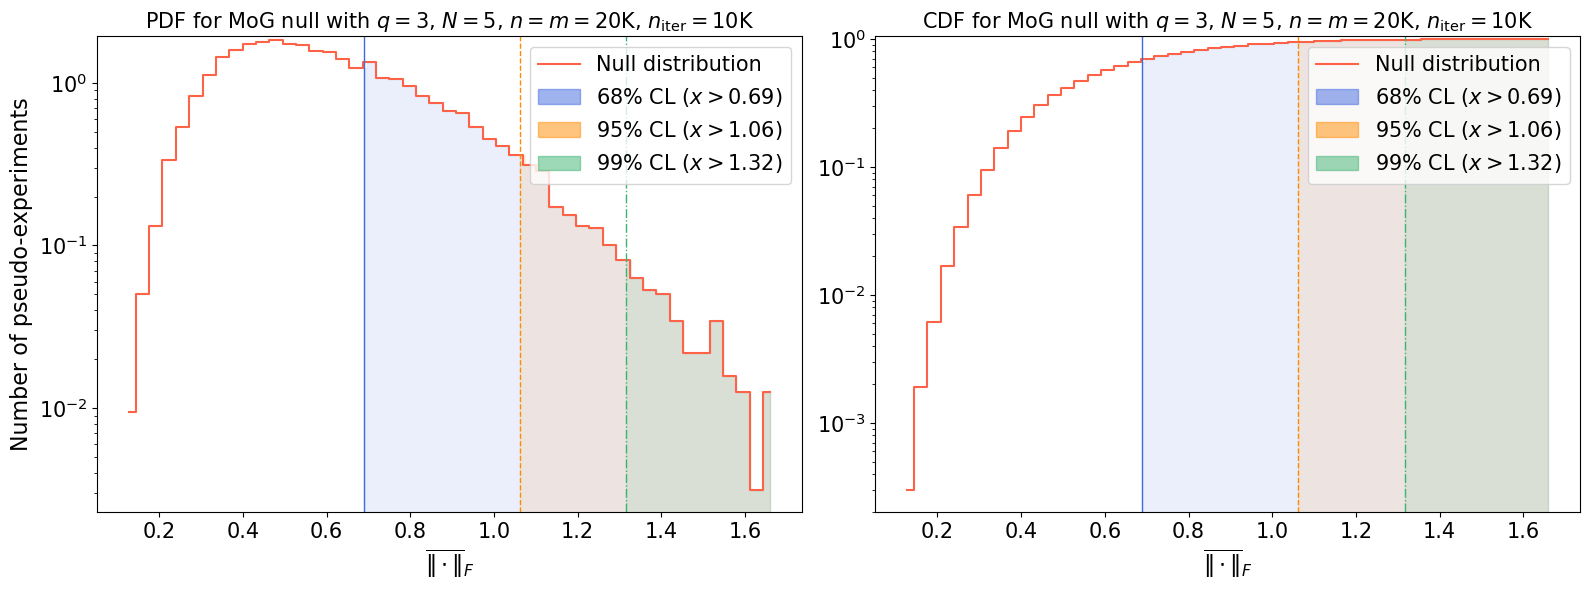

Time elapsed: 1.299142535077408 seconds.
mu = 0.49165975685205004 +/- 1.913716497671636e-05
sigma = 0.04374604550895585 +/- 0.0008011514029874044
68%CL = 0.4998882356462574, 95%CL = 0.5731660823966901, 99%CL = 0.6421035327711611


/tmp/ipykernel_33578/1925493866.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1925493866.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1925493866.py:120: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1925493866.py:126: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


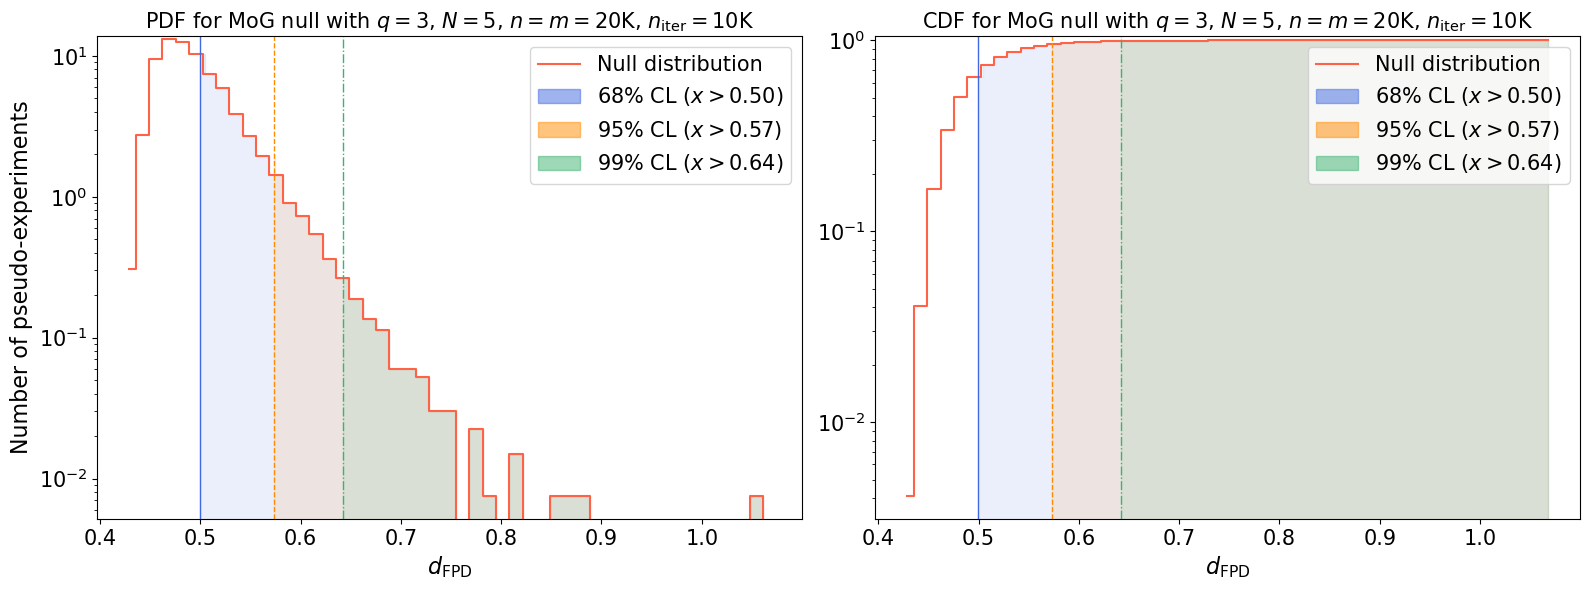

Time elapsed: 1.0167304470669478 seconds.
mu = -0.10623917130970129 +/- 5.7516305657190926e-05
sigma = 0.07583950531035322 +/- 0.0005777919407022749
68%CL = -0.07506427426084983, 95%CL = 0.026816479452573816, 99%CL = 0.0979364733544319


/tmp/ipykernel_33578/1925493866.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1925493866.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1925493866.py:120: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1925493866.py:126: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


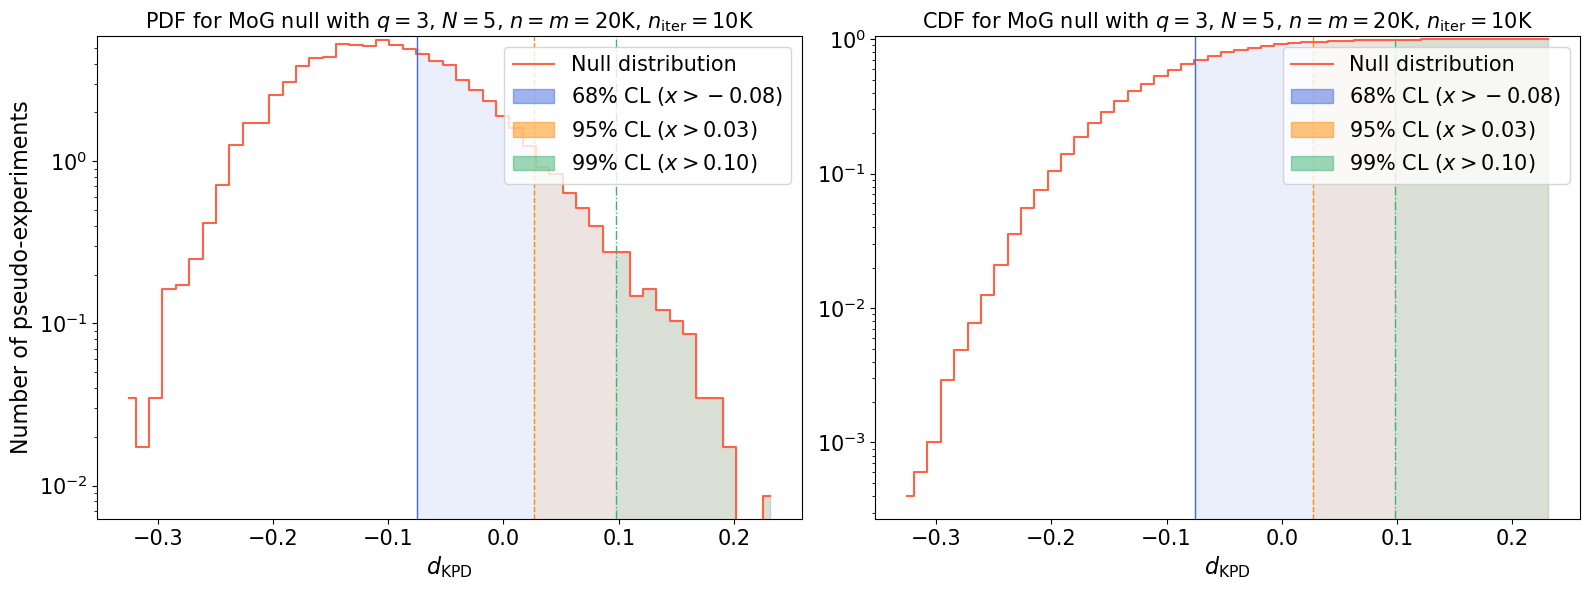

Time elapsed: 0.9169857939705253 seconds.
mu = 0.8667965846341104 +/- 0.0002376027625210832
sigma = 0.15414368703293793 +/- 0.0013175946166409012
68%CL = 0.9189987182617188, 95%CL = 1.1540013551712036, 99%CL = 1.3230007886886597


/tmp/ipykernel_33578/1925493866.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1925493866.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1925493866.py:120: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1925493866.py:126: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


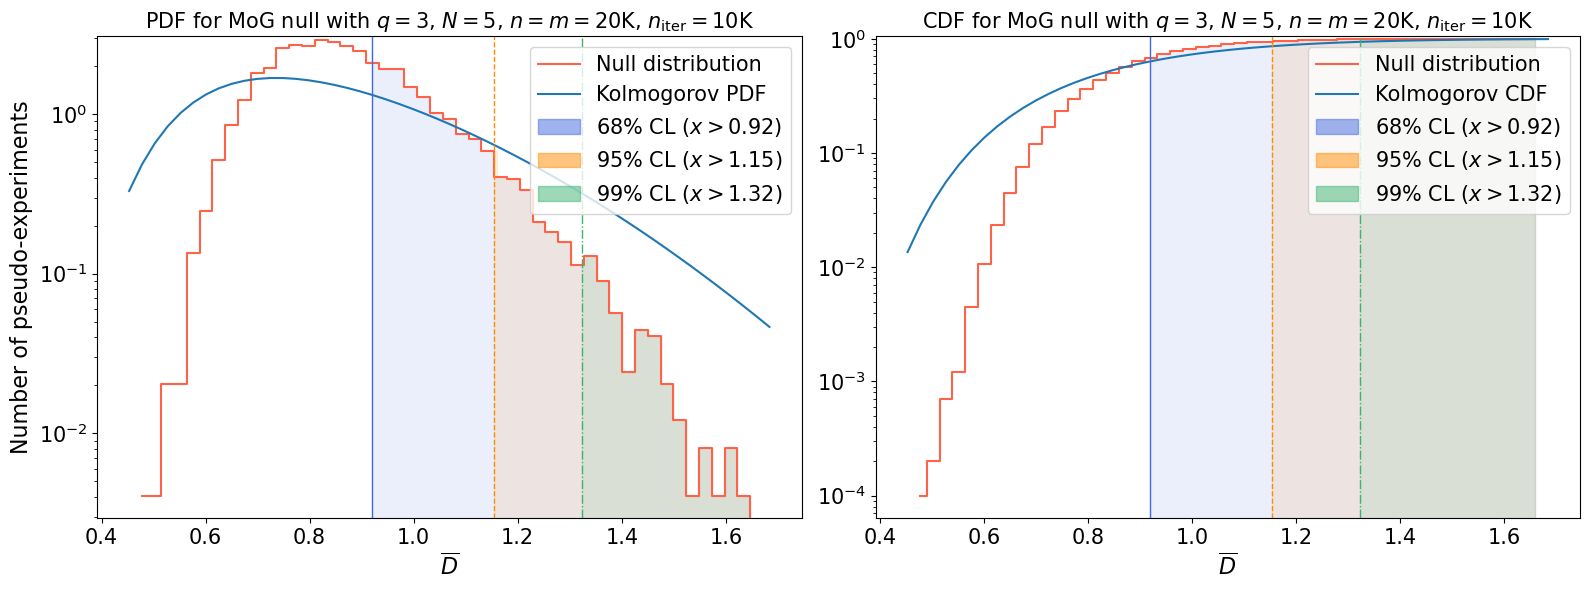

Time elapsed: 1.277350651100278 seconds.
mu = 0.8667149733239785 +/- 0.00014398077220061515
sigma = 0.11999198814946568 +/- 0.0009926774399841225
68%CL = 0.9092509746551514, 95%CL = 1.091250404715538, 99%CL = 1.2057003565132618


/tmp/ipykernel_33578/1925493866.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1925493866.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1925493866.py:120: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1925493866.py:126: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


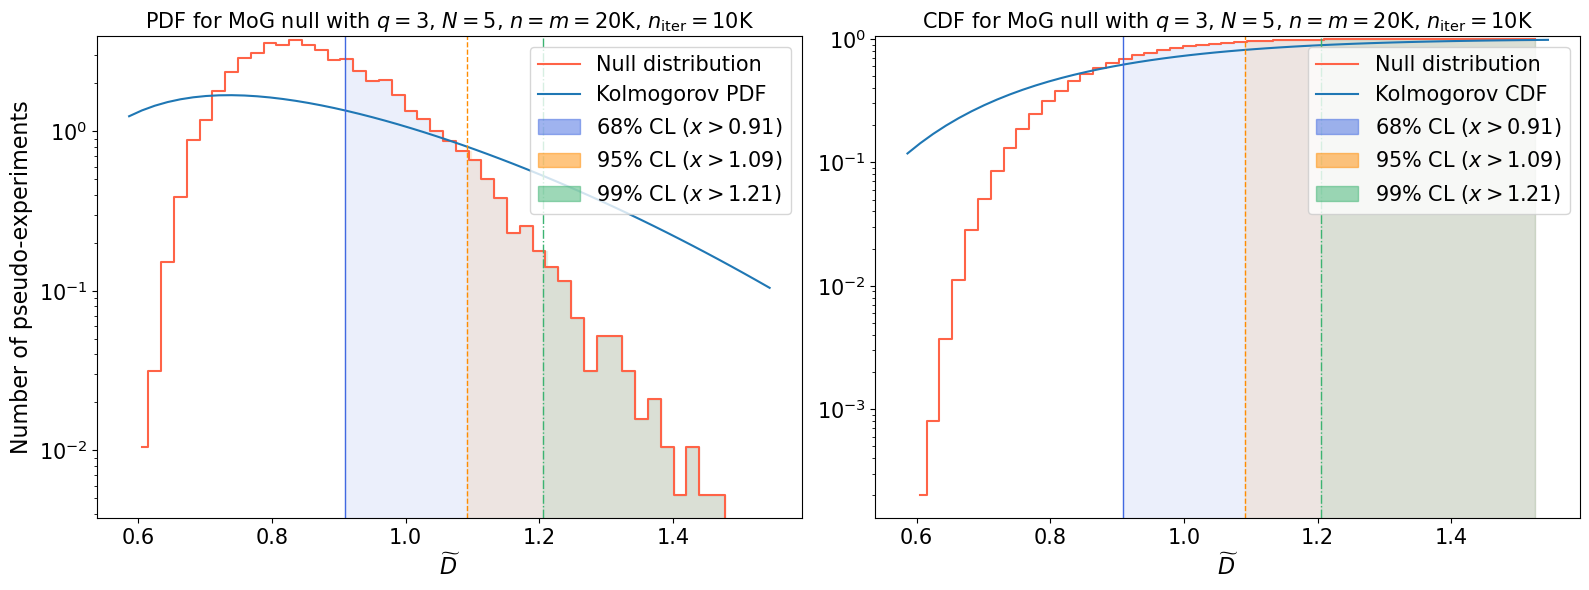

Time elapsed: 1.4796542308758944 seconds.
mu = 0.5426403833057082 +/- 0.00011451676886279781
sigma = 0.1070125080833067 +/- 0.0010074217736619003
68%CL = 0.5734886359764801, 95%CL = 0.7469444297474391, 99%CL = 0.8712533677071234


/tmp/ipykernel_33578/1925493866.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/1925493866.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/1925493866.py:120: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/1925493866.py:126: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


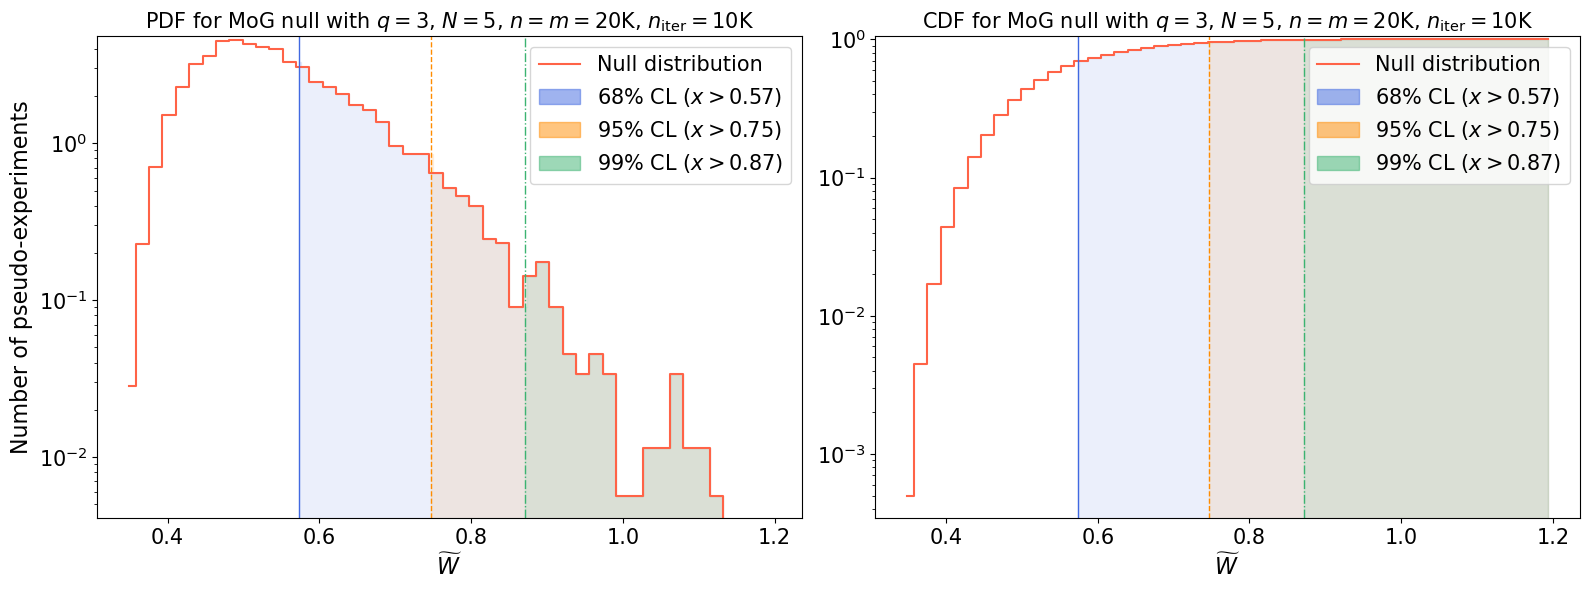

Time elapsed: 1.3398609599098563 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f864c393910>   
1          metric_list  <function <lambda> at 0x7f864c393880>   
2          metric_list  <function <lambda> at 0x7f864c393490>   
3      statistic_means  <function <lambda> at 0x7f864c393ac0>   
4         metric_means  <function <lambda> at 0x7f864c393520>   
5         metric_means  <function <lambda> at 0x7f864c3935b0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f864c393b50>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 20000, 'ba...           2000   
1  {'niter': 10000, 'batch_size_test': 20000, 'ba...            500   
2  {'niter': 10000, 'batch_size_test': 20000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 20000, 'ba...           5000   
4  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
5  {'niter': 10000, 'batch_size_test': 20000, 'ba...            200   
6  {'niter': 10000, 'batch_size_test': 20000, 'ba...           2000   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_20K/null_hypothesis/FN....   
1  results/5D_unimodal/5D_20K/null_hypothesis/FPD...   
2  results/5D_unimodal/5D_20K/null_hypothesis/KPD...   
3  results/5D_unimodal/5D_20K/null_hypothesis/KS....   
4  results/5D_unimodal/5D_20K/null_hypothesis/SKS...   
5  results/5D_unimodal/5D_20K/null_hypothesis/SWD...   
6  results/5D_unimodal/5D_20K/null_hypothesis/LR....   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6890541237472889], [0....   
1  [[0.68, [6800, 3199], 0.4998882356462574], [0....   
2  [[0.68, [6800, 3199], -0.07506427426084983], [...   
3  [[0.68, [6800, 3199], 0.9189987182617188], [0....   
4  [[0.68, [6800, 3199], 0.9092509746551514], [0....   
5  [[0.68, [6800, 3199], 0.5734886359764801], [0....   
6                                                 []   

                                         null_figure  
0  results/5D_unimodal/5D_20K/null_hypothesis/FN.pdf  
1  results/5D_unimodal/5D_20K/null_hypothesis/FPD...  
2  results/5D_unimodal/5D_20K/null_hypothesis/KPD...  
3  results/5D_unimodal/5D_20K/null_hypothesis/KS.pdf  
4  results/5D_unimodal/5D_20K/null_hypothesis/SKS...  
5  results/5D_unimodal/5D_20K/null_hypothesis/SWD...  
6                                                NaN

In [52]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Computing exclusion limits for fn with off deformation.

=============== fn - only off-diag of cov matrix ===============

------------ 1 ------------
eps = 2.5


statistic = 49.51557047242077 - next threshold = 1.0625020452814147 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.915971329677734

------------ 2 ------------
eps = 1.25
statistic = 49.51557047242077 - next threshold = 1.0625020452814147 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.915971329677734

------------ 3 ------------
eps = 0.625
statistic = 30.00609195341815 - next threshold = 1.0625020452814147 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.8632056480797439

------------ 4 ------------
eps = 0.3125
statistic = 14.080995832251983 - next threshold = 1.0625020452814147 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.7193509573880623

------------ 5 ------------
eps = 0.15625
statistic = 6.731676587197073 - next threshold = 1.0625020452814147 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.4547201980442437

------------ 6 ------------
eps = 0.078125
statistic = 3.2885858720110903 - next threshold = 1.0625

### Likelihood-ratio test

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [16]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.1,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Computing exclusion limits for lr with off deformation.

=============== lr - only off-diag of cov matrix ===============

------------ 1 ------------
eps = 0.05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 20000
nchunks = 5
Iterating from 0 to 2000 out of 10000 .


Iterating from 2000 to 4000 out of 10000 .


### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_off = results_df[results_df["Deformation"] == "off"]
results_df_cov = results_df[results_df["Deformation"] == "cov"]
results_df_mean_std = results_df[results_df["Deformation"] == "mean_std"]
results_df_mean_off = results_df[results_df["Deformation"] == "mean_off"]
results_df_mean_cov = results_df[results_df["Deformation"] == "mean_cov"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
43        lr        mean    5  10000                20000   
7        fpd        mean    5  10000                20000   
36       swd        mean    5  10000                20000   
29       sks        mean    5  10000                20000   
22        ks        mean    5  10000                20000   
0         fn        mean    5  10000                20000   
14       kpd        mean    5  10000                20000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
43                             0.00509                             0.00758   
7                              0.02296                             0.03101   
36                             0.02296                             0.03041   
29                             0.02312                             0.02957   
22                             0.03189                             0.04266   
0                              0.03311                             0.04509   
14                             0.23899                             0.24916   

    $t^{\mu}$ (s)  
43            616  
7             134  
36            123  
29            192  
22            105  
0              85  
14            637

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
43        lr                             0.00509   
7        fpd                             0.02296   
36       swd                             0.02296   
29       sks                             0.02312   
22        ks                             0.03189   
0         fn                             0.03311   
14       kpd                             0.23899   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
43                             0.00758            616  
7                              0.03101            134  
36                             0.03041            123  
29                             0.02957            192  
22                             0.04266            105  
0                              0.04509             85  
14                             0.24916            637

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
44        lr         std    5  10000                20000   
8        fpd         std    5  10000                20000   
37       swd         std    5  10000                20000   
1         fn         std    5  10000                20000   
30       sks         std    5  10000                20000   
23        ks         std    5  10000                20000   
15       kpd         std    5  10000                20000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
44                                0.00135   
8                                 0.01610   
37                                0.02388   
1                                 0.02434   
30                                0.02617   
23                                0.04623   
15                                2.47192   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
44                                0.00207               658  
8                                 0.02211               141  
37                                0.03193               122  
1                                 0.03147                82  
30                                0.03421               190  
23                                0.06286                98  
15                                2.58796               450

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
44        lr                                0.00135   
8        fpd                                0.01610   
37       swd                                0.02388   
1         fn                                0.02434   
30       sks                                0.02617   
23        ks                                0.04623   
15       kpd                                2.47192   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
44                                0.00207               658  
8                                 0.02211               141  
37                                0.03193               122  
1                                 0.03147                82  
30                                0.03421               190  
23                                0.06286                98  
15                                2.58796               450

In [ ]:
sorted_df_off = results_df_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_off)
sorted_df_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
45        lr         off    5  10000                20000   
9        fpd         off    5  10000                20000   
2         fn         off    5  10000                20000   
38       swd         off    5  10000                20000   
31       sks         off    5  10000                20000   
24        ks         off    5  10000                20000   
16       kpd         off    5  10000                20000   

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
45                                            0.00067        
9                                             0.00889        
2                                             0.01087        
38                                            0.01686        
31                                            0.01732        
24                                            0.04745        
16                                            2.22137        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
45                                            0.00103        
9                                             0.01205        
2                                             0.01403        
38                                            0.02317        
31                                            0.02302        
24                                            0.06348        
16                                            2.35027        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
45                                714  
9                                 152  
2                                  89  
38                                123  
31                                195  
24                                102  
16                                506

Statistic  $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
45        lr                                            0.00067        
9        fpd                                            0.00889        
2         fn                                            0.01087        
38       swd                                            0.01686        
31       sks                                            0.01732        
24        ks                                            0.04745        
16       kpd                                            2.22137        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
45                                            0.00103        
9                                             0.01205        
2                                             0.01403        
38                                            0.02317        
31                                            0.02302        
24                                            0.06348        
16                                            2.35027        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
45                                714  
9                                 152  
2                                  89  
38                                123  
31                                195  
24                                102  
16                                506

In [ ]:
sorted_df_cov = results_df_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_cov)
sorted_df_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
46        lr         cov    5  10000                20000   
10       fpd         cov    5  10000                20000   
39       swd         cov    5  10000                20000   
25        ks         cov    5  10000                20000   
32       sks         cov    5  10000                20000   
3         fn         cov    5  10000                20000   
17       kpd         cov    5  10000                20000   

    $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
46                                     0.00930   
10                                     0.02388   
39                                     0.03250   
25                                     0.04562   
32                                     0.04562   
3                                      0.10773   
17                                     1.94641   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
46                                     0.01298                    541  
10                                     0.03314                    142  
39                                     0.04296                    121  
25                                     0.06286                    103  
32                                     0.05878                    185  
3                                      0.14535                     69  
17                                     2.08806                    484

Statistic  $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
46        lr                                     0.00930   
10       fpd                                     0.02388   
39       swd                                     0.03250   
25        ks                                     0.04562   
32       sks                                     0.04562   
3         fn                                     0.10773   
17       kpd                                     1.94641   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
46                                     0.01298                    541  
10                                     0.03314                    142  
39                                     0.04296                    121  
25                                     0.06286                    103  
32                                     0.05878                    185  
3                                      0.14535                     69  
17                                     2.08806                    484

In [ ]:
sorted_df_mean_std = results_df_mean_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_mean_std)
sorted_df_mean_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
47        lr    mean_std    5  10000                20000   
11       fpd    mean_std    5  10000                20000   
40       swd    mean_std    5  10000                20000   
33       sks    mean_std    5  10000                20000   
4         fn    mean_std    5  10000                20000   
26        ks    mean_std    5  10000                20000   
18       kpd    mean_std    5  10000                20000   
19       kpd    mean_std    5  10000                20000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
47                                    0.00128   
11                                    0.01301   
40                                    0.01625   
33                                    0.01656   
4                                     0.02113   
26                                    0.02480   
18                                    0.23335   
19                                    0.23335   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
47                                    0.00196                   671  
11                                    0.01780                   153  
40                                    0.02180                   129  
33                                    0.02104                   203  
4                                     0.02805                    85  
26                                    0.03315                   112  
18                                    0.24309                   659  
19                                    0.24309                   610

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
47        lr                                    0.00128   
11       fpd                                    0.01301   
40       swd                                    0.01625   
33       sks                                    0.01656   
4         fn                                    0.02113   
26        ks                                    0.02480   
18       kpd                                    0.23335   
19       kpd                                    0.23335   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
47                                    0.00196                   671  
11                                    0.01780                   153  
40                                    0.02180                   129  
33                                    0.02104                   203  
4                                     0.02805                    85  
26                                    0.03315                   112  
18                                    0.24309                   659  
19                                    0.24309                   610

In [ ]:
sorted_df_mean_off = results_df_mean_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_mean_off)
sorted_df_mean_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
48        lr    mean_off    5  10000                20000   
12       fpd    mean_off    5  10000                20000   
5         fn    mean_off    5  10000                20000   
34       sks    mean_off    5  10000                20000   
41       swd    mean_off    5  10000                20000   
27        ks    mean_off    5  10000                20000   
20       kpd    mean_off    5  10000                20000   

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
48                                            0.00066            
12                                            0.00820            
5                                             0.01057            
34                                            0.01301            
41                                            0.01324            
27                                            0.02495            
20                                            0.23243            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
48                                            0.00101            
12                                            0.01121            
5                                             0.01380            
34                                            0.01689            
41                                            0.01788            
27                                            0.03299            
20                                            0.24189            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
48                                    720  
12                                    160  
5                                      89  
34                                    210  
41                                    132  
27                                    114  
20                                    613

Statistic  $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
48        lr                                            0.00066            
12       fpd                                            0.00820            
5         fn                                            0.01057            
34       sks                                            0.01301            
41       swd                                            0.01324            
27        ks                                            0.02495            
20       kpd                                            0.23243            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
48                                            0.00101            
12                                            0.01121            
5                                             0.01380            
34                                            0.01689            
41                                            0.01788            
27                                            0.03299            
20                                            0.24189            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
48                                    720  
12                                    160  
5                                      89  
34                                    210  
41                                    132  
27                                    114  
20                                    613

In [ ]:
sorted_df_mean_cov = results_df_mean_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_mean_cov)
sorted_df_mean_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
49        lr    mean_cov    5  10000                20000   
13       fpd    mean_cov    5  10000                20000   
42       swd    mean_cov    5  10000                20000   
35       sks    mean_cov    5  10000                20000   
28        ks    mean_cov    5  10000                20000   
6         fn    mean_cov    5  10000                20000   
21       kpd    mean_cov    5  10000                20000   

    $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
49                                         0.00428   
13                                         0.01595   
42                                         0.01839   
35                                         0.02007   
28                                         0.02449   
6                                          0.03098   
21                                         0.23102   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
49                                         0.00622                        612  
13                                         0.02211                        153  
42                                         0.02454                        125  
35                                         0.02561                        206  
28                                         0.03284                        116  
6                                          0.04205                         81  
21                                         0.24062                        542

Statistic  $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
49        lr                                         0.00428   
13       fpd                                         0.01595   
42       swd                                         0.01839   
35       sks                                         0.02007   
28        ks                                         0.02449   
6         fn                                         0.03098   
21       kpd                                         0.23102   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
49                                         0.00622                        612  
13                                         0.02211                        153  
42                                         0.02454                        125  
35                                         0.02561                        206  
28                                         0.03284                        116  
6                                          0.04205                         81  
21                                         0.24062                        542

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_off, on='Statistic', how='outer').merge(sorted_df_cov, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu$-deformation} & \\multicolumn{3}{c}{$\\sigma$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}$-deformation} \\\\").replace("$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu}$ (s)", "t (s)").replace("$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\sigma}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}}$ (s)", "t (s)").replace("\\bottomrule\n\\end{tabular}\n","").replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=2\\cdot 10^{4}}$} \\\\").rstrip())
result_table = sorted_df_mean_std.merge(sorted_df_mean_off, on='Statistic', how='outer').merge(sorted_df_mean_cov, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g").replace("$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\sigma}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\Sigma_{ij}}$ (s)","t (s)").replace("\\begin{tabular}{l|llr|llr|llr|r}","").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu-\\sigma$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}$-deformation} & \\multicolumn{3}{c}{} \\\\").lstrip())

\begin{tabular}{l|llr|llr|llr|llr}
\toprule
\multicolumn{13}{c}{$\mathbf{n=m=2\cdot 10^{4}}$} \\
\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\sigma$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}-\Sigma_{ii}$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}$-deformation} \\
Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0051 & 0.0076 & 616 & 0.0014 & 0.0021 & 658 & 0.00067 & 0.001 & 714 & 0.0093 & 0.013 & 541 \\
$d_{\mathrm{FPD}}$ & 0.023 & 0.031 & 134 & 0.016 & 0.022 & 141 & 0.0089 & 0.012 & 152 & 0.024 & 0.033 & 142 \\
$\widetilde{W}$ & 0.023 & 0.03 & 123 & 0.024 & 0.032 & 122 & 0.017 & 0.023 & 123 & 0.033 & 0.043 & 121 \\
$\widetilde{D}$ & 0.023 & 0.03 & 192 & 0.026 & 0.034

# Fixed $n=50000$

## Null hypotheses

### Model definition

In [109]:
batch_size_test = 50_000

In [110]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [111]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 500000000
batch_size 50000
niter 10000
niter * batch_size 500000000
small_sample False


In [112]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 50_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [113]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            50000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  500000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [114]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 1000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 50000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 500000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 1000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results/5D_unimodal/5D_50K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_ke

### Evaluate null hypotheses

In [115]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results/5D_unimodal/5D_50K/null_hypothesis/FN.json
Loading fpd from results/5D_unimodal/5D_50K/null_hypothesis/FPD.json
Loading kpd from results/5D_unimodal/5D_50K/null_hypothesis/KPD.json
Loading ks from results/5D_unimodal/5D_50K/null_hypothesis/KS.json
Loading sks from results/5D_unimodal/5D_50K/null_hypothesis/SKS.json
Loading swd from results/5D_unimodal/5D_50K/null_hypothesis/SWD.json


In [116]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6893521851997055], [0.95, [9500, 500], 1.0639518543797588], [0.99, [9900, 100], 1.299456117624684]]
Computing time for metric fn: 13.90866357786581
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.3726652101883758], [0.95, [9500, 500], 0.3966684490545914], [0.99, [9900, 100], 0.4175888318342676]]
Computing time for metric fpd: 173.22811249596998
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.23518726651445834], [0.95, [9500, 500], 0.2878808437623448], [0.99, [9900, 100], 0.3158333305297134]]
Computing time for metric kpd: 21340.02876418596
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9195923391205665], [0.95, [9500, 500], 1.1491744735113314], [0.99, [9900, 100], 1.304123518459827]]
Computing time for metric ks: 52.20618011499755
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9059613828876086], [0.95, [9500, 500], 1.089089135384617], [0.99, [9900, 100], 1.2154849737958495]]
Computing time for metric sks: 512.8600190479774


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f83902c8040>   
1          metric_list  <function <lambda> at 0x7f83902c91b0>   
2          metric_list  <function <lambda> at 0x7f83902cb1c0>   
3      statistic_means  <function <lambda> at 0x7f83902c8790>   
4         metric_means  <function <lambda> at 0x7f83903583a0>   
5         metric_means  <function <lambda> at 0x7f83343be950>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f83343bedd0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 50000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 50000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 50000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 50000, 'ba...           2000   
4  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
5  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
6  {'niter': 10000, 'batch_size_test': 50000, 'ba...           1000   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_50K/null_hypothesis/FN....   
1  results/5D_unimodal/5D_50K/null_hypothesis/FPD...   
2  results/5D_unimodal/5D_50K/null_hypothesis/KPD...   
3  results/5D_unimodal/5D_50K/null_hypothesis/KS....   
4  results/5D_unimodal/5D_50K/null_hypothesis/SKS...   
5  results/5D_unimodal/5D_50K/null_hypothesis/SWD...   
6  results/5D_unimodal/5D_50K/null_hypothesis/LR....   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6893521851997055], [0....  
1  [[0.68, [6800, 3199], 0.3726652101883758], [0....  
2  [[0.68, [6800, 3199], 0.23518726651445834], [0...  
3  [[0.68, [6800, 3199], 0.9195923391205665], [0....  
4  [[0.68, [6800, 3199], 0.9059613828876086], [0....  
5  [[0.68, [6800, 3199], 0.5709800042305047], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6014748692230288 +/- 0.0006063077009182409
sigma = 0.24623316204732476 +/- 0.001960532275757481
68%CL = 0.6893521851997055, 95%CL = 1.0639518543797588, 99%CL = 1.299456117624684
mu = 0.6014748692230288 +/- 0.0006063077009182409
sigma = 0.24623316204732476 +/- 0.001960532275757481


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


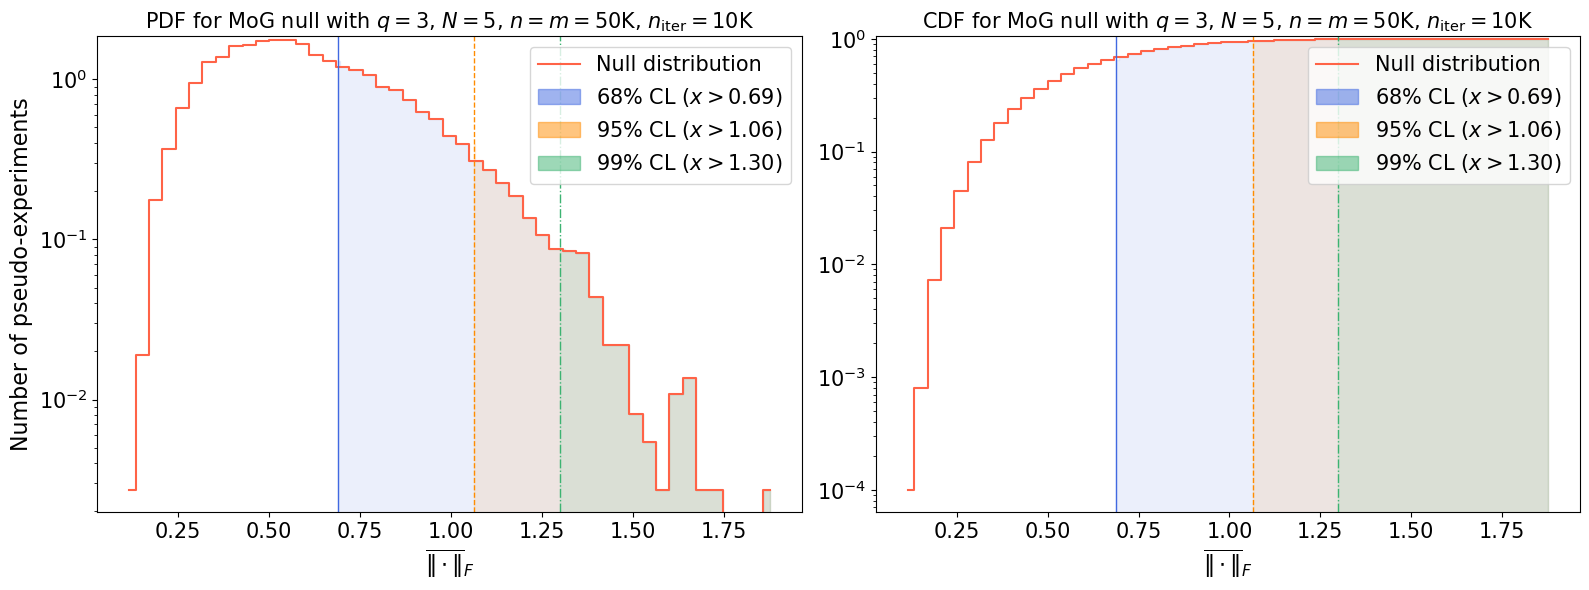

Time elapsed: 1.377864960115403 seconds.
mu = 0.3698815307241467 +/- 1.8874126134481925e-06
sigma = 0.013738313628128426 +/- 0.00017378402838397108
68%CL = 0.3726652101883758, 95%CL = 0.3966684490545914, 99%CL = 0.4175888318342676
mu = 0.3698815307241467 +/- 1.8874126134481925e-06
sigma = 0.013738313628128426 +/- 0.00017378402838397108


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


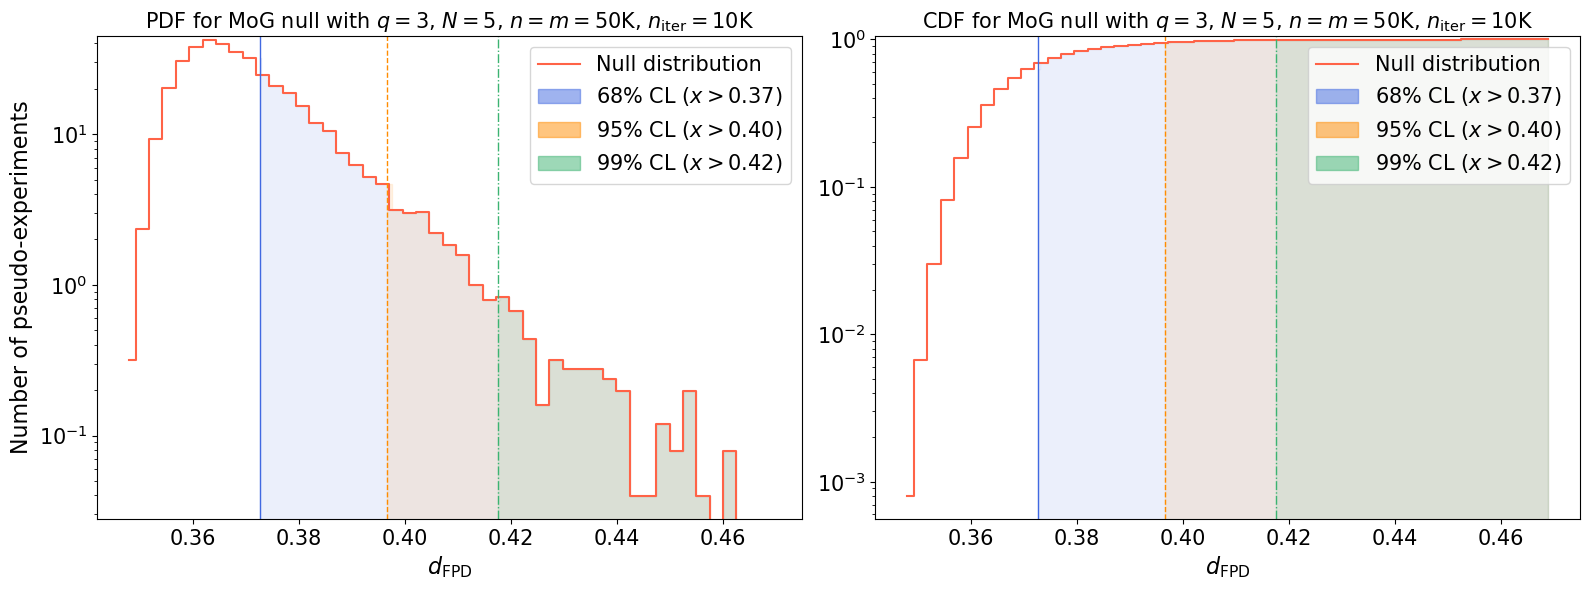

Time elapsed: 1.3492641020566225 seconds.
mu = 0.21706856704780053 +/- 1.717197853445421e-05
sigma = 0.0414390860594852 +/- 0.0003038235634082012
68%CL = 0.23518726651445834, 95%CL = 0.2878808437623448, 99%CL = 0.3158333305297134
mu = 0.21706856704780053 +/- 1.717197853445421e-05
sigma = 0.0414390860594852 +/- 0.0003038235634082012


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


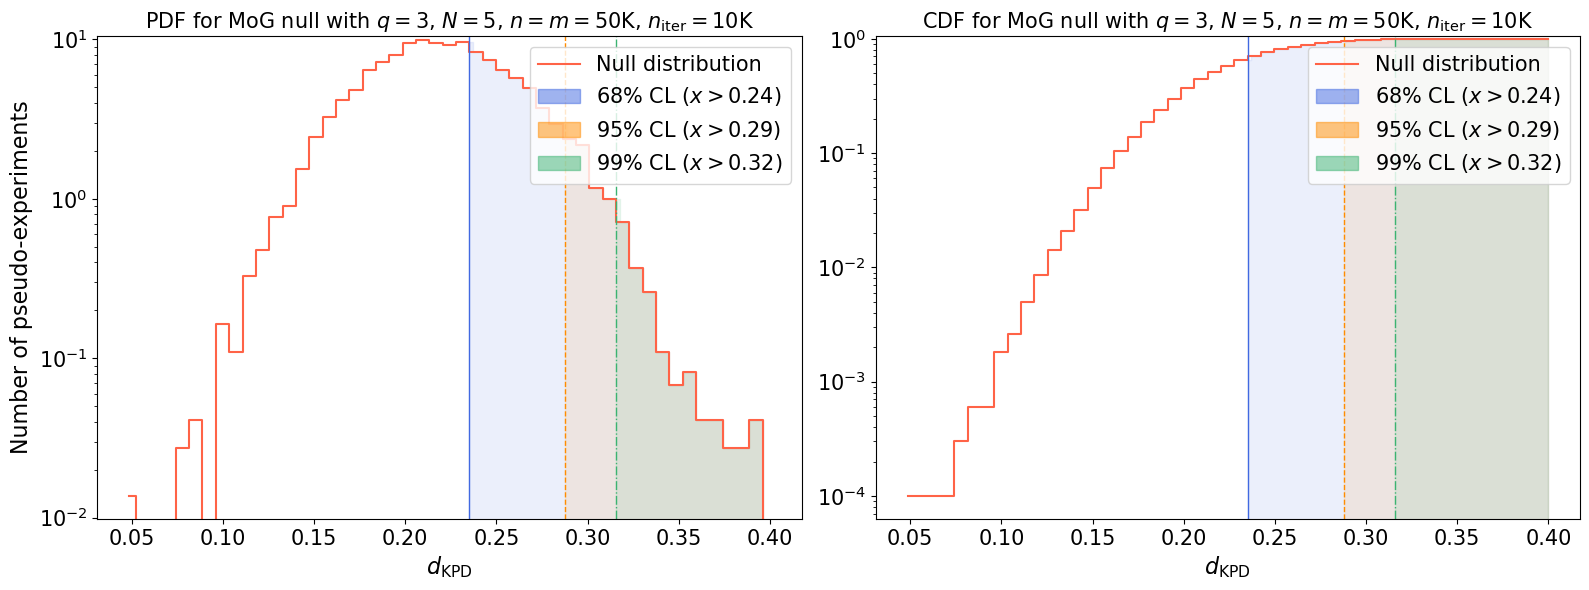

Time elapsed: 1.48462251201272 seconds.
mu = 0.8674599100777739 +/- 0.000231885753003611
sigma = 0.15227795408515674 +/- 0.0012860236010537067
68%CL = 0.9195923391205665, 95%CL = 1.1491744735113314, 99%CL = 1.304123518459827
mu = 0.8674599100777739 +/- 0.000231885753003611
sigma = 0.15227795408515674 +/- 0.0012860236010537067


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


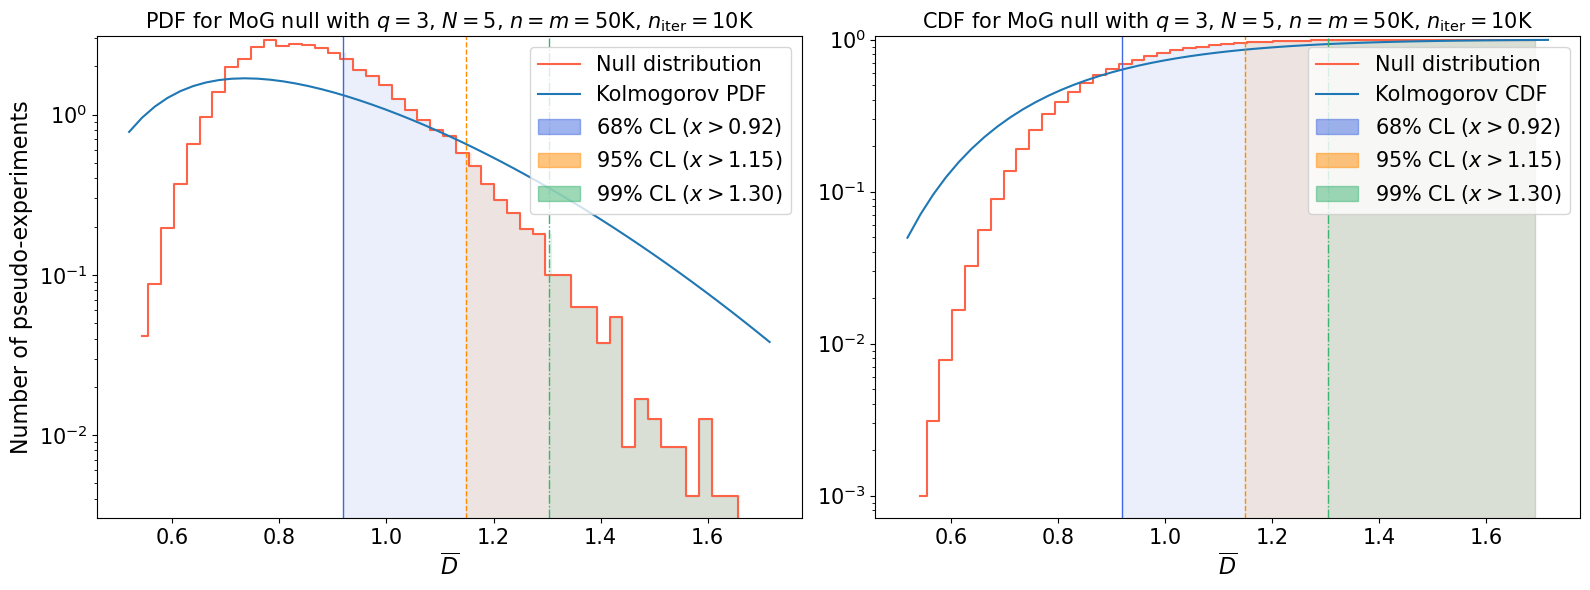

Time elapsed: 1.8123512789607048 seconds.
mu = 0.8664596922331977 +/- 0.00014380396148422074
sigma = 0.11991828946587786 +/- 0.0010303458919960521
68%CL = 0.9059613828876086, 95%CL = 1.089089135384617, 99%CL = 1.2154849737958495
mu = 0.8664596922331977 +/- 0.00014380396148422074
sigma = 0.11991828946587786 +/- 0.0010303458919960521


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


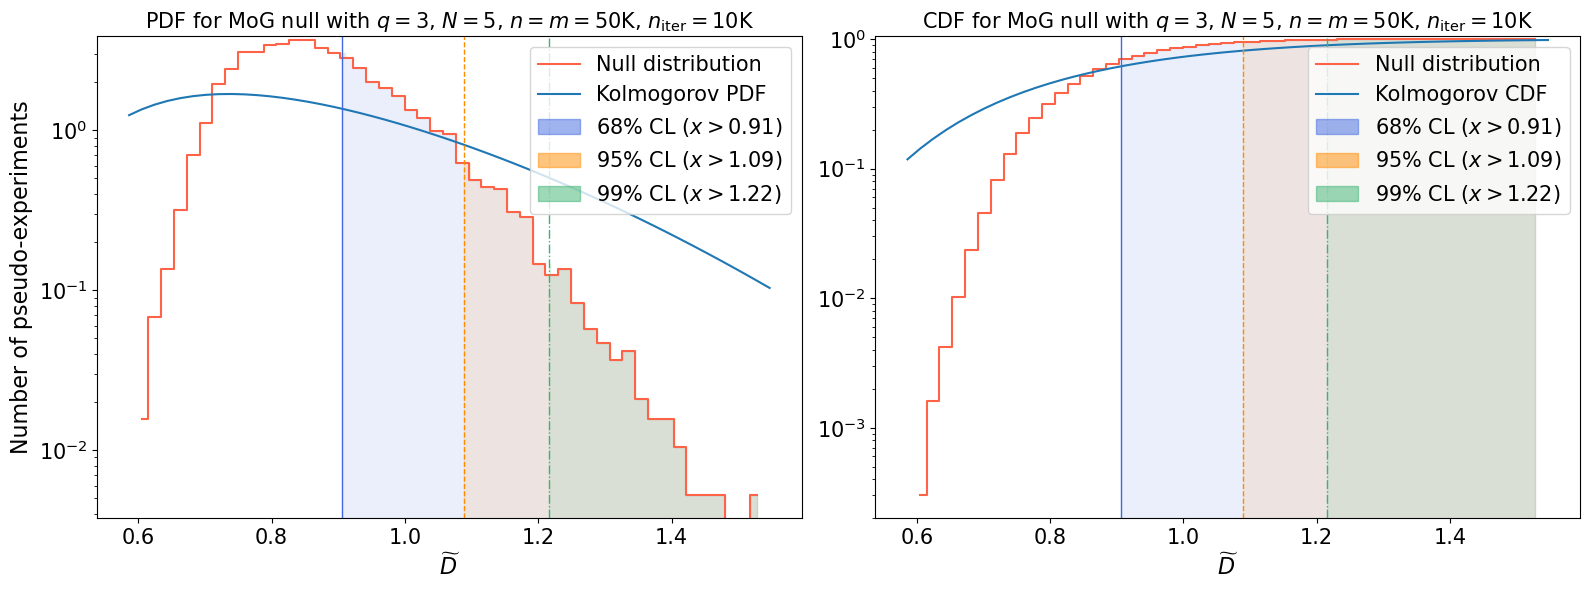

Time elapsed: 1.7698792160954326 seconds.
mu = 0.5424008660242174 +/- 0.00011445140276957467
sigma = 0.1069819623906641 +/- 0.0010526649062118263
68%CL = 0.5709800042305047, 95%CL = 0.7471597795490943, 99%CL = 0.8781146020668623
mu = 0.5424008660242174 +/- 0.00011445140276957467
sigma = 0.1069819623906641 +/- 0.0010526649062118263


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


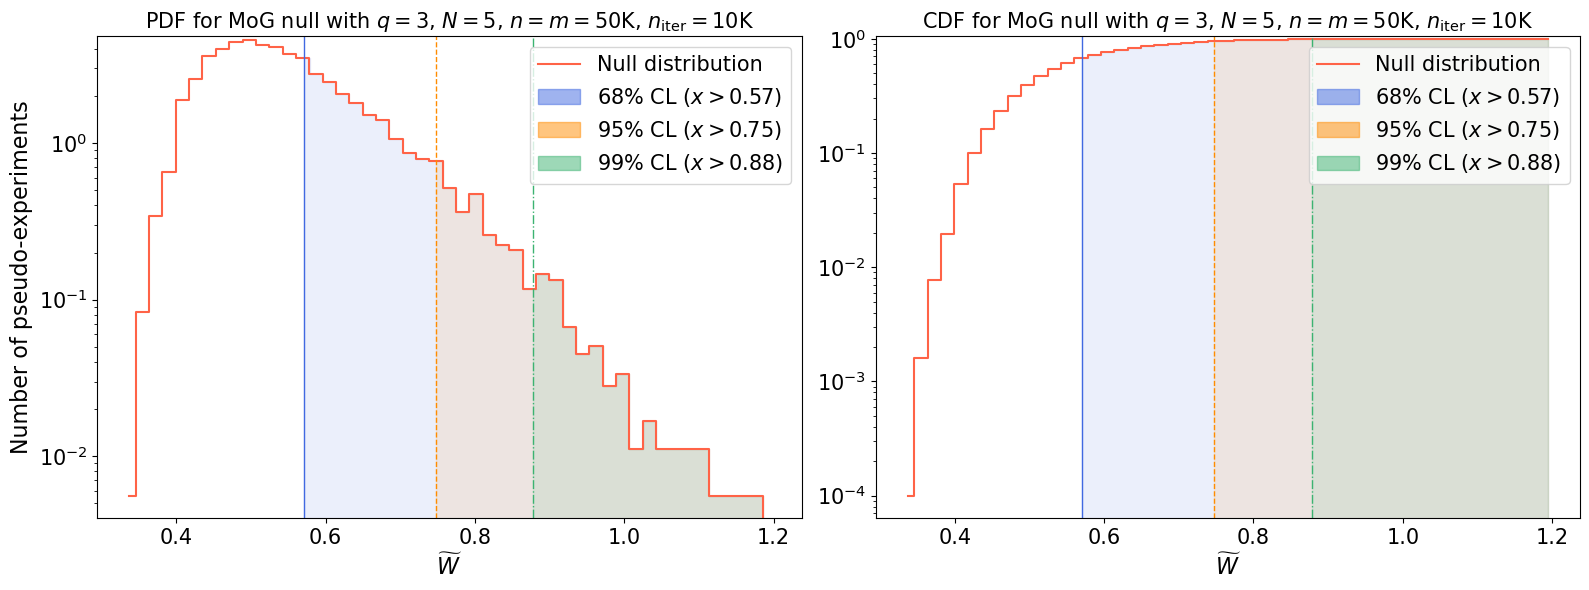

Time elapsed: 1.078646149020642 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f864c31ac20>   
1          metric_list  <function <lambda> at 0x7f864c3936d0>   
2          metric_list  <function <lambda> at 0x7f864c393760>   
3      statistic_means  <function <lambda> at 0x7f864c3939a0>   
4         metric_means  <function <lambda> at 0x7f866c771bd0>   
5         metric_means  <function <lambda> at 0x7f866c7716c0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f866c771cf0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 50000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 50000, 'ba...            200   
2  {'niter': 10000, 'batch_size_test': 50000, 'ba...              1   
3  {'niter': 10000, 'batch_size_test': 50000, 'ba...           2000   
4  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
5  {'niter': 10000, 'batch_size_test': 50000, 'ba...            100   
6  {'niter': 10000, 'batch_size_test': 50000, 'ba...           1000   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_50K/null_hypothesis/FN....   
1  results/5D_unimodal/5D_50K/null_hypothesis/FPD...   
2  results/5D_unimodal/5D_50K/null_hypothesis/KPD...   
3  results/5D_unimodal/5D_50K/null_hypothesis/KS....   
4  results/5D_unimodal/5D_50K/null_hypothesis/SKS...   
5  results/5D_unimodal/5D_50K/null_hypothesis/SWD...   
6  results/5D_unimodal/5D_50K/null_hypothesis/LR....   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6893521851997055], [0....   
1  [[0.68, [6800, 3199], 0.3726652101883758], [0....   
2  [[0.68, [6800, 3199], 0.23518726651445834], [0...   
3  [[0.68, [6800, 3199], 0.9195923391205665], [0....   
4  [[0.68, [6800, 3199], 0.9059613828876086], [0....   
5  [[0.68, [6800, 3199], 0.5709800042305047], [0....   
6                                                 []   

                                         null_figure  
0  results/5D_unimodal/5D_50K/null_hypothesis/FN.pdf  
1  results/5D_unimodal/5D_50K/null_hypothesis/FPD...  
2  results/5D_unimodal/5D_50K/null_hypothesis/KPD...  
3  results/5D_unimodal/5D_50K/null_hypothesis/KS.pdf  
4  results/5D_unimodal/5D_50K/null_hypothesis/SKS...  
5  results/5D_unimodal/5D_50K/null_hypothesis/SWD...  
6                                                NaN

In [76]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [117]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [118]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [119]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with off deformation already loaded.
Exclusion limits for fn with cov deformation already loaded.
Exclusion limits for fn with mean_std deformation already loaded.
Exclusion limits for fn with mean_off deformation already loaded.
Exclusion limits for fn with mean_cov deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with off deformation already loaded.
Exclusion limits for fpd with cov deformation already loaded.
Exclusion limits for fpd with mean_std deformation already loaded.
Exclusion limits for fpd with mean_off deformation already loaded.
Exclusion limits for fpd with mean_cov deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformatio

### Likelihood-ratio test

In [120]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [121]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.1,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with off deformation already loaded.
Exclusion limits for LR with cov deformation already loaded.
Exclusion limits for LR with mean_std deformation already loaded.
Exclusion limits for LR with mean_off deformation already loaded.
Exclusion limits for LR with mean_cov deformation already loaded.
dict_keys(['2024-04-16T16:31:59.194646', '2024-04-16T16:33:18.739521', '2024-04-16T16:34:45.431663', '2024-04-16T16:36:21.178046', '2024-04-16T16:37:37.760638', '2024-04-16T16:39:07.532740', '2024-04-16T16:40:43.641635', '2024-04-16T16:42:07.059823', '2024-04-16T16:44:33.005631', '2024-04-16T16:47:08.620663', '2024-04-16T16:49:50.807150', '2024-04-16T16:52:22.004127', '2024-04-16T16:55:05.065328', '2024-04-16T16:58:01.018941', '2024-04-16T17:00:44.932169', '2024-04-16T17:10:13.007023', '2024-04-16T17:17:17.642765', '2024-04-16T17:24:00.459942', '2024-

### Show and save results

In [122]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [123]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_off = results_df[results_df["Deformation"] == "off"]
results_df_cov = results_df[results_df["Deformation"] == "cov"]
results_df_mean_std = results_df[results_df["Deformation"] == "mean_std"]
results_df_mean_off = results_df[results_df["Deformation"] == "mean_off"]
results_df_mean_cov = results_df[results_df["Deformation"] == "mean_cov"]

In [124]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
42        lr        mean    5  10000                50000   
28       sks        mean    5  10000                50000   
35       swd        mean    5  10000                50000   
7        fpd        mean    5  10000                50000   
21        ks        mean    5  10000                50000   
0         fn        mean    5  10000                50000   
14       kpd        mean    5  10000                50000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
42                             0.00519                             0.00659   
28                             0.01534                             0.01982   
35                             0.01579                             0.02058   
7                              0.01717                             0.02211   
21                             0.02098                             0.02729   
0                              0.03159                             0.03902   
14                             0.09125                             0.09574   

    $t^{\mu}$ (s)  
42           1142  
28            223  
35            134  
7             145  
21            142  
0              79  
14            568

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
42        lr                             0.00519   
28       sks                             0.01534   
35       swd                             0.01579   
7        fpd                             0.01717   
21        ks                             0.02098   
0         fn                             0.03159   
14       kpd                             0.09125   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
42                             0.00659           1142  
28                             0.01982            223  
35                             0.02058            134  
7                              0.02211            145  
21                             0.02729            142  
0                              0.03902             79  
14                             0.09574            568

In [125]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
43        lr         std    5  10000                50000   
8        fpd         std    5  10000                50000   
1         fn         std    5  10000                50000   
36       swd         std    5  10000                50000   
29       sks         std    5  10000                50000   
22        ks         std    5  10000                50000   
15       kpd         std    5  10000                50000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
43                                0.00138   
8                                 0.01125   
1                                 0.01202   
36                                0.01579   
29                                0.01671   
22                                0.03014   
15                                1.45020   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
43                                0.00186              1217  
8                                 0.01479               155  
1                                 0.01620                86  
36                                0.02119               144  
29                                0.02241               230  
22                                0.03969               137  
15                                1.50739               424

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
43        lr                                0.00138   
8        fpd                                0.01125   
1         fn                                0.01202   
36       swd                                0.01579   
29       sks                                0.01671   
22        ks                                0.03014   
15       kpd                                1.45020   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
43                                0.00186              1217  
8                                 0.01479               155  
1                                 0.01620                86  
36                                0.02119               144  
29                                0.02241               230  
22                                0.03969               137  
15                                1.50739               424

In [126]:
sorted_df_off = results_df_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_off)
sorted_df_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
44        lr         off    5  10000                50000   
2         fn         off    5  10000                50000   
9        fpd         off    5  10000                50000   
30       sks         off    5  10000                50000   
37       swd         off    5  10000                50000   
23        ks         off    5  10000                50000   
16       kpd         off    5  10000                50000   

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
44                                            0.00070        
2                                             0.00547        
9                                             0.00593        
30                                            0.01087        
37                                            0.01095        
23                                            0.03014        
16                                            0.99121        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
44                                            0.00092        
2                                             0.00740        
9                                             0.00788        
30                                            0.01479        
37                                            0.01510        
23                                            0.03908        
16                                            1.04993        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
44                               1403  
2                                  95  
9                                 162  
30                                245  
37                                148  
23                                139  
16                                402

Statistic  $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
44        lr                                            0.00070        
2         fn                                            0.00547        
9        fpd                                            0.00593        
30       sks                                            0.01087        
37       swd                                            0.01095        
23        ks                                            0.03014        
16       kpd                                            0.99121        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
44                                            0.00092        
2                                             0.00740        
9                                             0.00788        
30                                            0.01479        
37                                            0.01510        
23                                            0.03908        
16                                            1.04993        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
44                               1403  
2                                  95  
9                                 162  
30                                245  
37                                148  
23                                139  
16                                402

In [127]:
sorted_df_cov = results_df_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_cov)
sorted_df_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
45        lr         cov    5  10000                50000   
10       fpd         cov    5  10000                50000   
38       swd         cov    5  10000                50000   
31       sks         cov    5  10000                50000   
24        ks         cov    5  10000                50000   
3         fn         cov    5  10000                50000   
17       kpd         cov    5  10000                50000   

    $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
45                                     0.00558   
10                                     0.01778   
38                                     0.02174   
31                                     0.02922   
24                                     0.02998   
3                                      0.05936   
17                                     1.31104   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
45                                     0.00790                   1110  
10                                     0.02348                    151  
38                                     0.02850                    141  
31                                     0.03878                    221  
24                                     0.03984                    139  
3                                      0.08077                     76  
17                                     1.36507                    424

Statistic  $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
45        lr                                     0.00558   
10       fpd                                     0.01778   
38       swd                                     0.02174   
31       sks                                     0.02922   
24        ks                                     0.02998   
3         fn                                     0.05936   
17       kpd                                     1.31104   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
45                                     0.00790                   1110  
10                                     0.02348                    151  
38                                     0.02850                    141  
31                                     0.03878                    221  
24                                     0.03984                    139  
3                                      0.08077                     76  
17                                     1.36507                    424

In [128]:
sorted_df_mean_std = results_df_mean_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_mean_std)
sorted_df_mean_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
46        lr    mean_std    5  10000                50000   
11       fpd    mean_std    5  10000                50000   
32       sks    mean_std    5  10000                50000   
39       swd    mean_std    5  10000                50000   
4         fn    mean_std    5  10000                50000   
25        ks    mean_std    5  10000                50000   
18       kpd    mean_std    5  10000                50000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
46                                    0.00142   
11                                    0.00965   
32                                    0.01095   
39                                    0.01125   
4                                     0.01377   
25                                    0.01610   
18                                    0.08881   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
46                                    0.00187                  1204  
11                                    0.01258                   163  
32                                    0.01411                   251  
39                                    0.01487                   150  
4                                     0.01796                    89  
25                                    0.02089                   144  
18                                    0.09270                   578

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
46        lr                                    0.00142   
11       fpd                                    0.00965   
32       sks                                    0.01095   
39       swd                                    0.01125   
4         fn                                    0.01377   
25        ks                                    0.01610   
18       kpd                                    0.08881   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
46                                    0.00187                  1204  
11                                    0.01258                   163  
32                                    0.01411                   251  
39                                    0.01487                   150  
4                                     0.01796                    89  
25                                    0.02089                   144  
18                                    0.09270                   578

In [129]:
sorted_df_mean_off = results_df_mean_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_mean_off)
sorted_df_mean_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
47        lr    mean_off    5  10000                50000   
12       fpd    mean_off    5  10000                50000   
5         fn    mean_off    5  10000                50000   
33       sks    mean_off    5  10000                50000   
40       swd    mean_off    5  10000                50000   
26        ks    mean_off    5  10000                50000   
19       kpd    mean_off    5  10000                50000   

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
47                                            0.00072            
12                                            0.00578            
5                                             0.00605            
33                                            0.00858            
40                                            0.00904            
26                                            0.01625            
19                                            0.08759            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
47                                            0.00095            
12                                            0.00755            
5                                             0.00799            
33                                            0.01121            
40                                            0.01213            
26                                            0.02089            
19                                            0.09148            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
47                                   1329  
12                                    175  
5                                      96  
33                                    247  
40                                    149  
26                                    149  
19                                    574

Statistic  $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
47        lr                                            0.00072            
12       fpd                                            0.00578            
5         fn                                            0.00605            
33       sks                                            0.00858            
40       swd                                            0.00904            
26        ks                                            0.01625            
19       kpd                                            0.08759            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
47                                            0.00095            
12                                            0.00755            
5                                             0.00799            
33                                            0.01121            
40                                            0.01213            
26                                            0.02089            
19                                            0.09148            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
47                                   1329  
12                                    175  
5                                      96  
33                                    247  
40                                    149  
26                                    149  
19                                    574

In [130]:
sorted_df_mean_cov = results_df_mean_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_mean_cov)
sorted_df_mean_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
48        lr    mean_cov    5  10000                50000   
13       fpd    mean_cov    5  10000                50000   
41       swd    mean_cov    5  10000                50000   
34       sks    mean_cov    5  10000                50000   
27        ks    mean_cov    5  10000                50000   
6         fn    mean_cov    5  10000                50000   
20       kpd    mean_cov    5  10000                50000   

    $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
48                                         0.00392   
13                                         0.01247   
41                                         0.01270   
34                                         0.01324   
27                                         0.01610   
6                                          0.02846   
20                                         0.08942   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
48                                         0.00513                       1108  
13                                         0.01620                        163  
41                                         0.01674                        148  
34                                         0.01712                        248  
27                                         0.02089                        149  
6                                          0.03529                         83  
20                                         0.09391                        579

Statistic  $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
48        lr                                         0.00392   
13       fpd                                         0.01247   
41       swd                                         0.01270   
34       sks                                         0.01324   
27        ks                                         0.01610   
6         fn                                         0.02846   
20       kpd                                         0.08942   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
48                                         0.00513                       1108  
13                                         0.01620                        163  
41                                         0.01674                        148  
34                                         0.01712                        248  
27                                         0.02089                        149  
6                                          0.03529                         83  
20                                         0.09391                        579

In [131]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_off, on='Statistic', how='outer').merge(sorted_df_cov, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu$-deformation} & \\multicolumn{3}{c}{$\\sigma$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}$-deformation} \\\\").replace("$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu}$ (s)", "t (s)").replace("$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\sigma}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}}$ (s)", "t (s)").replace("\\bottomrule\n\\end{tabular}\n","").replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=5\\cdot 10^{4}}$} \\\\").rstrip())
result_table = sorted_df_mean_std.merge(sorted_df_mean_off, on='Statistic', how='outer').merge(sorted_df_mean_cov, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g").replace("$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\sigma}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\Sigma_{ij}}$ (s)","t (s)").replace("\\begin{tabular}{l|llr|llr|llr|r}","").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu-\\sigma$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}$-deformation} & \\multicolumn{3}{c}{} \\\\").lstrip())

\begin{tabular}{l|llr|llr|llr|llr}
\toprule
\multicolumn{13}{c}{$\mathbf{n=m=5\cdot 10^{4}}$} \\
\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\sigma$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}-\Sigma_{ii}$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}$-deformation} \\
Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0052 & 0.0066 & 1142 & 0.0014 & 0.0019 & 1217 & 0.0007 & 0.00092 & 1403 & 0.0056 & 0.0079 & 1110 \\
$\widetilde{D}$ & 0.015 & 0.02 & 223 & 0.017 & 0.022 & 230 & 0.011 & 0.015 & 245 & 0.029 & 0.039 & 221 \\
$\widetilde{W}$ & 0.016 & 0.021 & 134 & 0.016 & 0.021 & 144 & 0.011 & 0.015 & 148 & 0.022 & 0.029 & 141 \\
$d_{\mathrm{FPD}}$ & 0.017 & 0.022 & 145 & 0.011 &

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [132]:
batch_size_test = 100_000

In [133]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [134]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [135]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 5_000,
                               num_batches = 1,
                               batch_size = 100_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [136]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000           100000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims    nsamples  small_sample  \
0       True        5           0  float64     5  1000000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [137]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 500, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 500,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results/5D_unimodal/5D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_

### Evaluate null hypotheses

In [138]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results/5D_unimodal/5D_100K/null_hypothesis/FN.json
Loading fpd from results/5D_unimodal/5D_100K/null_hypothesis/FPD.json
Loading kpd from results/5D_unimodal/5D_100K/null_hypothesis/KPD.json
Loading ks from results/5D_unimodal/5D_100K/null_hypothesis/KS.json
Loading sks from results/5D_unimodal/5D_100K/null_hypothesis/SKS.json
Loading swd from results/5D_unimodal/5D_100K/null_hypothesis/SWD.json


In [139]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6864965309141355], [0.95, [9500, 500], 1.0649348701336006], [0.99, [9900, 100], 1.3101005770964511]]
Computing time for metric fn: 22.262674685800448
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.336860673008416], [0.95, [9500, 500], 0.3477311650345061], [0.99, [9900, 100], 0.3572972443114822]]
Computing time for metric fpd: 263.01628754800186
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.07998042113732673], [0.95, [9500, 500], -0.03772345929001775], [0.99, [9900, 100], -0.013588570245803844]]
Computing time for metric kpd: 30477.472858420108
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9225997387330281], [0.95, [9500, 500], 1.1484487598657587], [0.99, [9900, 100], 1.3018394222155032]]
Computing time for metric ks: 87.83812924008816
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9066588006737435], [0.95, [9500, 500], 1.0886312421137199], [0.99, [9900, 100], 1.2107876027270617]]
Computing time for metric sks: 752.7953

name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f83583a7760>   
1          metric_list  <function <lambda> at 0x7f83583a76d0>   
2          metric_list  <function <lambda> at 0x7f83583a7b50>   
3      statistic_means  <function <lambda> at 0x7f83583a7d90>   
4         metric_means  <function <lambda> at 0x7f83583a71c0>   
5         metric_means  <function <lambda> at 0x7f83583a7a30>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f83583a79a0>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            500   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...           1000   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...            200   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_100K/null_hypothesis/FN...   
1  results/5D_unimodal/5D_100K/null_hypothesis/FP...   
2  results/5D_unimodal/5D_100K/null_hypothesis/KP...   
3  results/5D_unimodal/5D_100K/null_hypothesis/KS...   
4  results/5D_unimodal/5D_100K/null_hypothesis/SK...   
5  results/5D_unimodal/5D_100K/null_hypothesis/SW...   
6  results/5D_unimodal/5D_100K/null_hypothesis/LR...   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.6864965309141355], [0....  
1  [[0.68, [6800, 3199], 0.336860673008416], [0.9...  
2  [[0.68, [6800, 3199], -0.07998042113732673], [...  
3  [[0.68, [6800, 3199], 0.9225997387330281], [0....  
4  [[0.68, [6800, 3199], 0.9066588006737435], [0....  
5  [[0.68, [6800, 3199], 0.5723781863565185], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.6031738045338384 +/- 0.0006094264710318534
sigma = 0.24686564585455253 +/- 0.002043813857228116
68%CL = 0.6864965309141355, 95%CL = 1.0649348701336006, 99%CL = 1.3101005770964511
mu = 0.6031738045338384 +/- 0.0006094264710318534
sigma = 0.24686564585455253 +/- 0.002043813857228116


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


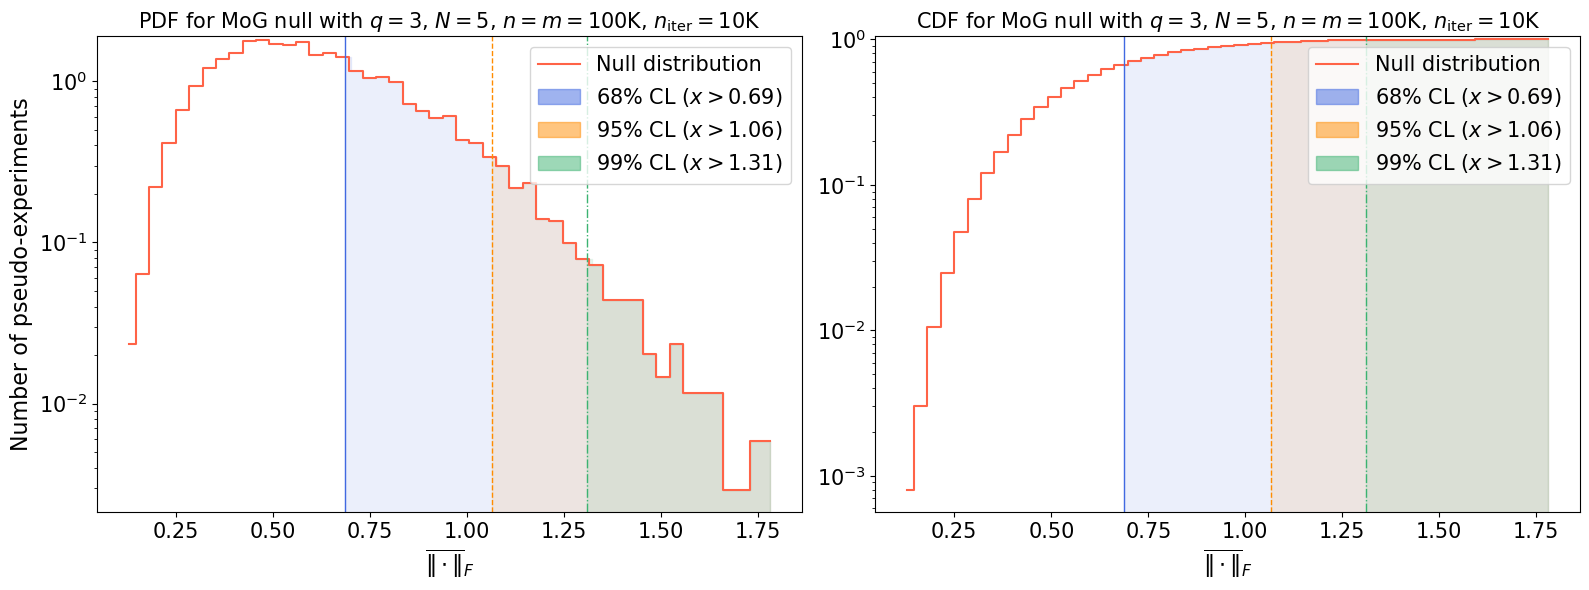

Time elapsed: 1.36903490498662 seconds.
mu = 0.33551827327741035 +/- 3.955387247050431e-07
sigma = 0.00628918694828706 +/- 7.737377144647847e-05
68%CL = 0.336860673008416, 95%CL = 0.3477311650345061, 99%CL = 0.3572972443114822
mu = 0.33551827327741035 +/- 3.955387247050431e-07
sigma = 0.00628918694828706 +/- 7.737377144647847e-05


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


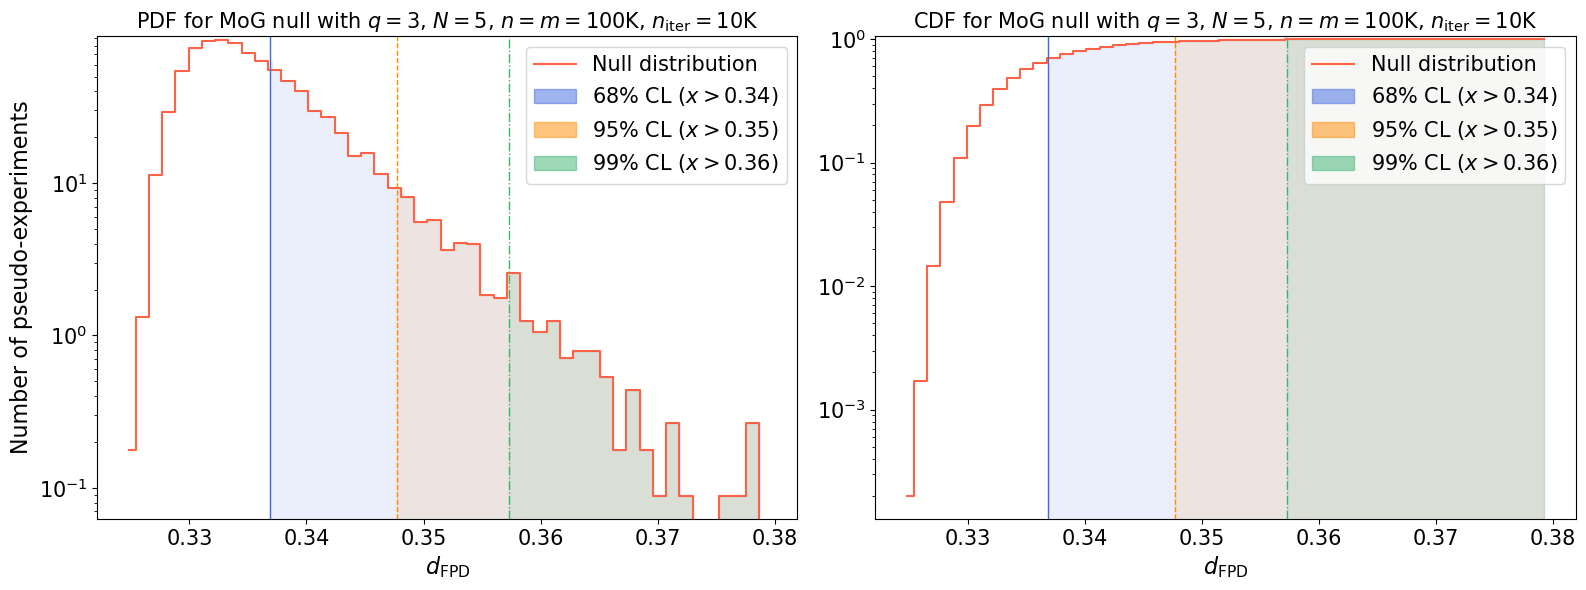

Time elapsed: 1.3465318819507957 seconds.
mu = -0.09602558759166185 +/- 1.2185595543294852e-05
sigma = 0.034907872383310404 +/- 0.000249868811846431
68%CL = -0.07998042113732673, 95%CL = -0.03772345929001775, 99%CL = -0.013588570245803844
mu = -0.09602558759166185 +/- 1.2185595543294852e-05
sigma = 0.034907872383310404 +/- 0.000249868811846431


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


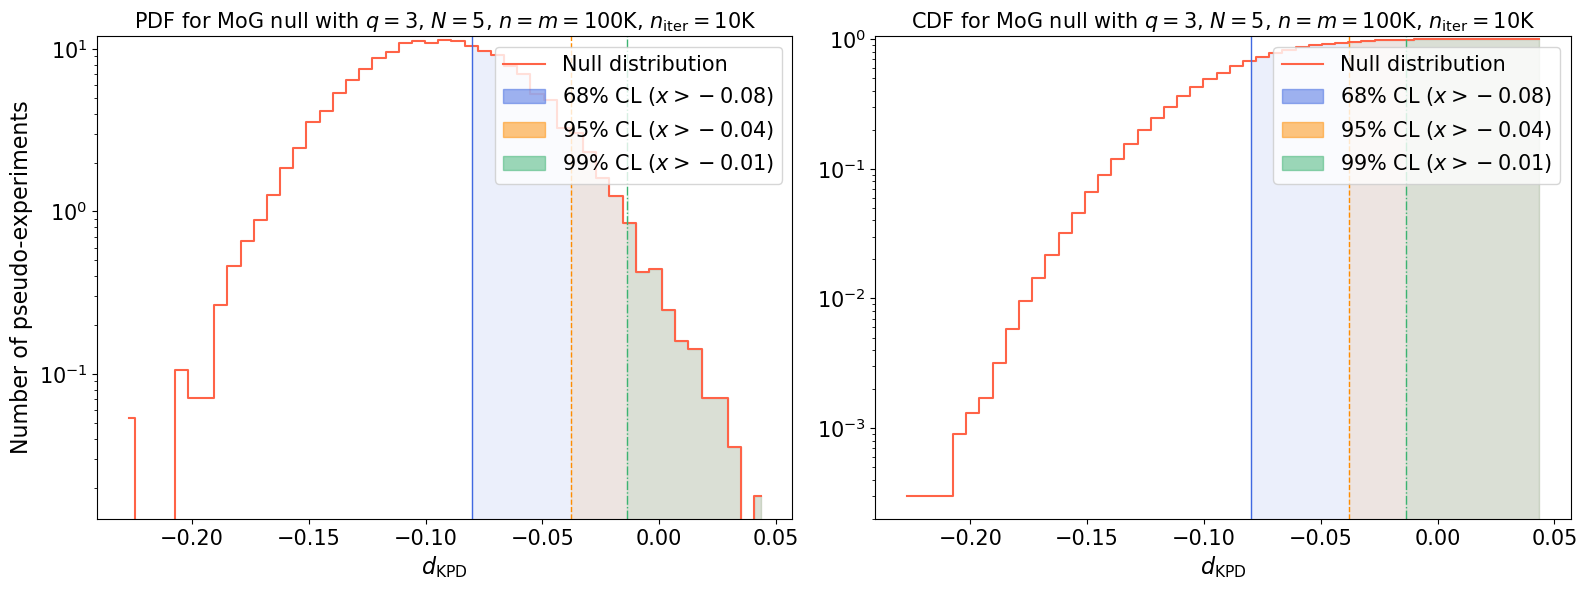

Time elapsed: 1.2218463099561632 seconds.
mu = 0.8671576558296965 +/- 0.000229855907338346
sigma = 0.15160999549447457 +/- 0.0012416355438809427
68%CL = 0.9225997387330281, 95%CL = 1.1484487598657587, 99%CL = 1.3018394222155032
mu = 0.8671576558296965 +/- 0.000229855907338346
sigma = 0.15160999549447457 +/- 0.0012416355438809427


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


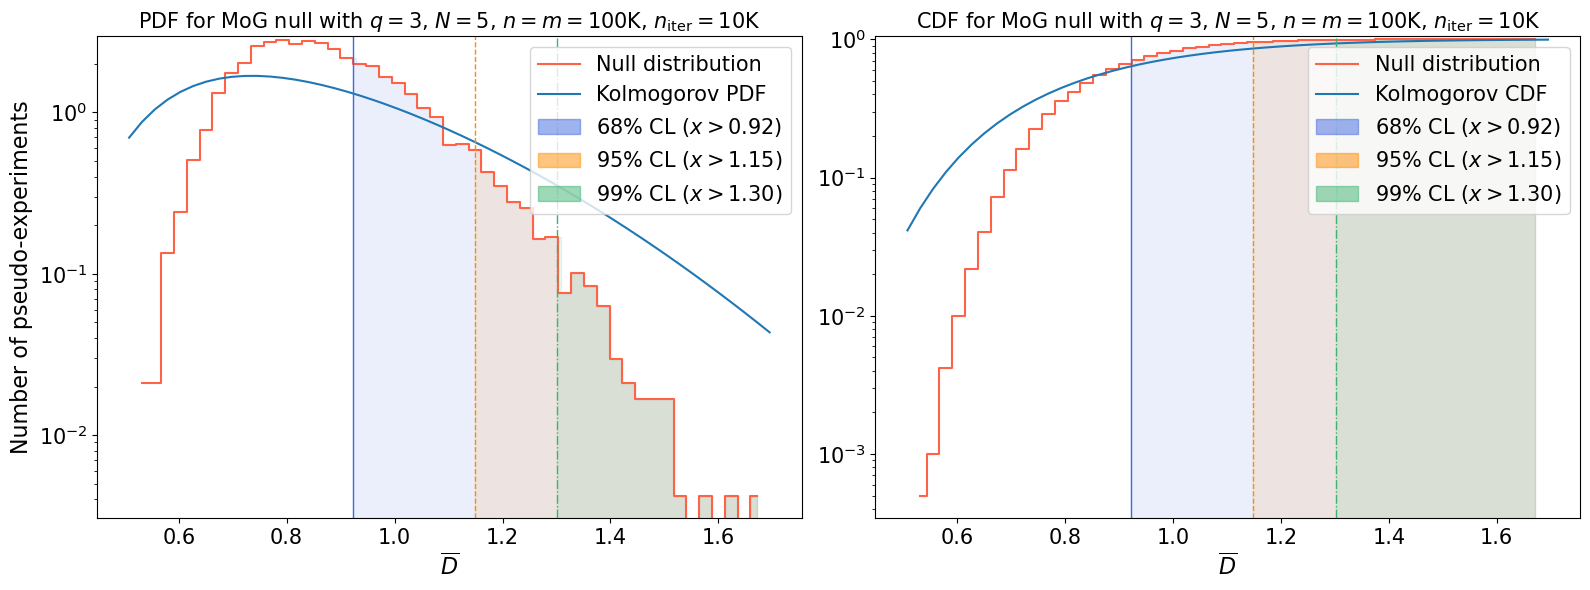

Time elapsed: 1.2274725439492613 seconds.
mu = 0.865879352134588 +/- 0.00014409841001630991
sigma = 0.12004099717026259 +/- 0.0010252371802540133
68%CL = 0.9066588006737435, 95%CL = 1.0886312421137199, 99%CL = 1.2107876027270617
mu = 0.865879352134588 +/- 0.00014409841001630991
sigma = 0.12004099717026259 +/- 0.0010252371802540133


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


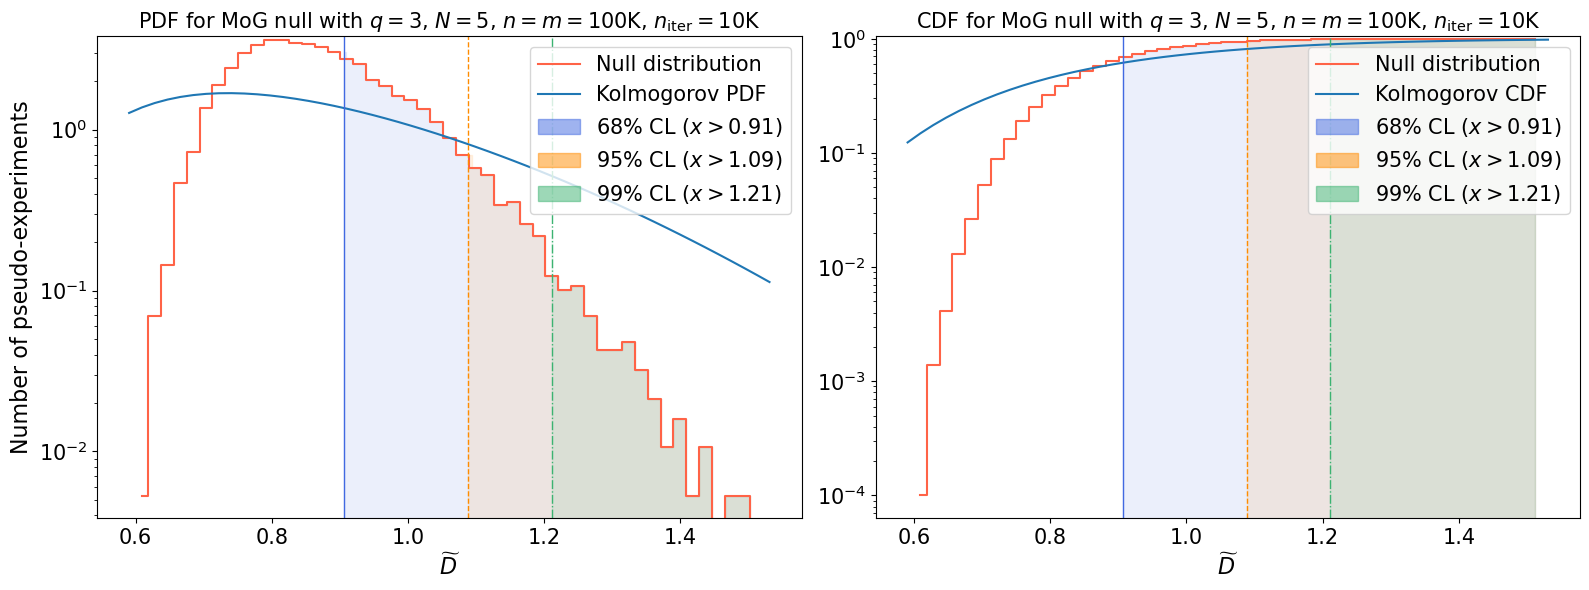

Time elapsed: 1.597300595836714 seconds.
mu = 0.5416624783925067 +/- 0.00011419865682139421
sigma = 0.10686377160731049 +/- 0.0010551935622729644
68%CL = 0.5723781863565185, 95%CL = 0.7456241616928099, 99%CL = 0.8680672200370332
mu = 0.5416624783925067 +/- 0.00011419865682139421
sigma = 0.10686377160731049 +/- 0.0010551935622729644


/tmp/ipykernel_33578/2986165322.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_33578/2986165322.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_33578/2986165322.py:122: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_33578/2986165322.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


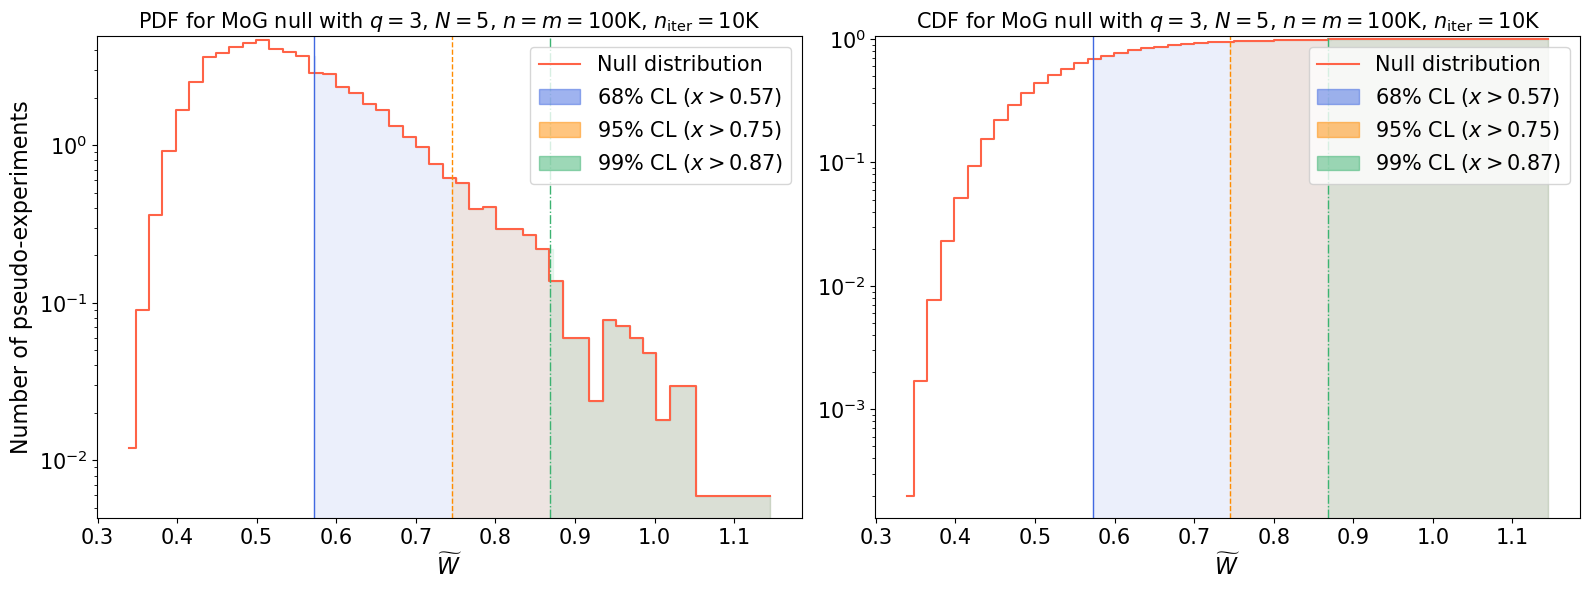

Time elapsed: 1.3250878378748894 seconds.


name object_name          class_name                               kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                   {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                   {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                   {}   
3   ks      KSTest     GMetrics.KSTest                                   {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 100, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 100, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                  {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f86c01e9870>   
1          metric_list  <function <lambda> at 0x7f86c04d9c60>   
2          metric_list  <function <lambda> at 0x7f86c04dae60>   
3      statistic_means  <function <lambda> at 0x7f86c04daef0>   
4         metric_means  <function <lambda> at 0x7f86c04d9fc0>   
5         metric_means  <function <lambda> at 0x7f86c04d9510>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f86c04da950>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1              lambda ns, ndims: 10000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...            500   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...            100   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...           1000   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             50   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...            200   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  results/5D_unimodal/5D_100K/null_hypothesis/FN...   
1  results/5D_unimodal/5D_100K/null_hypothesis/FP...   
2  results/5D_unimodal/5D_100K/null_hypothesis/KP...   
3  results/5D_unimodal/5D_100K/null_hypothesis/KS...   
4  results/5D_unimodal/5D_100K/null_hypothesis/SK...   
5  results/5D_unimodal/5D_100K/null_hypothesis/SW...   
6  results/5D_unimodal/5D_100K/null_hypothesis/LR...   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.6864965309141355], [0....   
1  [[0.68, [6800, 3199], 0.336860673008416], [0.9...   
2  [[0.68, [6800, 3199], -0.07998042113732673], [...   
3  [[0.68, [6800, 3199], 0.9225997387330281], [0....   
4  [[0.68, [6800, 3199], 0.9066588006737435], [0....   
5  [[0.68, [6800, 3199], 0.5723781863565185], [0....   
6                                                 []   

                                         null_figure  
0  results/5D_unimodal/5D_100K/null_hypothesis/FN...  
1  results/5D_unimodal/5D_100K/null_hypothesis/FP...  
2  results/5D_unimodal/5D_100K/null_hypothesis/KP...  
3  results/5D_unimodal/5D_100K/null_hypothesis/KS...  
4  results/5D_unimodal/5D_100K/null_hypothesis/SK...  
5  results/5D_unimodal/5D_100K/null_hypothesis/SW...  
6                                                NaN

In [100]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [140]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [141]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [142]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with off deformation already loaded.
Exclusion limits for fn with cov deformation already loaded.
Exclusion limits for fn with mean_std deformation already loaded.
Exclusion limits for fn with mean_off deformation already loaded.
Exclusion limits for fn with mean_cov deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with off deformation already loaded.
Exclusion limits for fpd with cov deformation already loaded.
Exclusion limits for fpd with mean_std deformation already loaded.
Exclusion limits for fpd with mean_off deformation already loaded.
Exclusion limits for fpd with mean_cov deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformatio

### Likelihood-ratio test

In [143]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [144]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.1,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Exclusion limits for LR with off deformation already loaded.
Exclusion limits for LR with cov deformation already loaded.
Exclusion limits for LR with mean_std deformation already loaded.
Exclusion limits for LR with mean_off deformation already loaded.
Exclusion limits for LR with mean_cov deformation already loaded.
dict_keys(['2024-04-17T01:20:57.954776', '2024-04-17T01:22:38.307208', '2024-04-17T01:24:18.175940', '2024-04-17T01:26:02.014242', '2024-04-17T01:27:27.307904', '2024-04-17T01:29:02.266754', '2024-04-17T01:30:44.038430', '2024-04-17T01:32:16.094169', '2024-04-17T01:34:57.085261', '2024-04-17T01:37:41.822009', '2024-04-17T01:40:37.339497', '2024-04-17T01:43:22.489518', '2024-04-17T01:46:19.580577', '2024-04-17T01:49:25.287404', '2024-04-17T01:52:24.190821', '2024-04-17T02:01:10.493986', '2024-04-17T02:07:10.899169', '2024-04-17T02:13:33.773414', '2024-

### Show and save results

In [145]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [146]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_off = results_df[results_df["Deformation"] == "off"]
results_df_cov = results_df[results_df["Deformation"] == "cov"]
results_df_mean_std = results_df[results_df["Deformation"] == "mean_std"]
results_df_mean_off = results_df[results_df["Deformation"] == "mean_off"]
results_df_mean_cov = results_df[results_df["Deformation"] == "mean_cov"]

In [147]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
42        lr        mean    5  10000               100000   
35       swd        mean    5  10000               100000   
7        fpd        mean    5  10000               100000   
28       sks        mean    5  10000               100000   
0         fn        mean    5  10000               100000   
21        ks        mean    5  10000               100000   
14       kpd        mean    5  10000               100000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
42                             0.00342                             0.00449   
35                             0.01163                             0.01464   
7                              0.01179                             0.01517   
28                             0.01209                             0.01510   
0                              0.01400                             0.01940   
21                             0.01522                             0.01971   
14                             0.15686                             0.16100   

    $t^{\mu}$ (s)  
42           2151  
35            151  
7             160  
28            250  
0             100  
21            147  
14            526

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
42        lr                             0.00342   
35       swd                             0.01163   
7        fpd                             0.01179   
28       sks                             0.01209   
0         fn                             0.01400   
21        ks                             0.01522   
14       kpd                             0.15686   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
42                             0.00449           2151  
35                             0.01464            151  
7                              0.01517            160  
28                             0.01510            250  
0                              0.01940            100  
21                             0.01971            147  
14                             0.16100            526

In [148]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
43        lr         std    5  10000               100000   
8        fpd         std    5  10000               100000   
1         fn         std    5  10000               100000   
36       swd         std    5  10000               100000   
29       sks         std    5  10000               100000   
22        ks         std    5  10000               100000   
15       kpd         std    5  10000               100000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
43                                0.00110   
8                                 0.00843   
1                                 0.01034   
36                                0.01194   
29                                0.01385   
22                                0.02647   
15                                2.00195   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
43                                0.00140              2295  
8                                 0.01091               164  
1                                 0.01357                99  
36                                0.01537               151  
29                                0.01758               247  
22                                0.03300               139  
15                                2.04294               360

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
43        lr                                0.00110   
8        fpd                                0.00843   
1         fn                                0.01034   
36       swd                                0.01194   
29       sks                                0.01385   
22        ks                                0.02647   
15       kpd                                2.00195   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
43                                0.00140              2295  
8                                 0.01091               164  
1                                 0.01357                99  
36                                0.01537               151  
29                                0.01758               247  
22                                0.03300               139  
15                                2.04294               360

In [149]:
sorted_df_off = results_df_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_off)
sorted_df_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
44        lr         off    5  10000               100000   
9        fpd         off    5  10000               100000   
2         fn         off    5  10000               100000   
37       swd         off    5  10000               100000   
30       sks         off    5  10000               100000   
23        ks         off    5  10000               100000   
16       kpd         off    5  10000               100000   

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
44                                            0.00054        
9                                             0.00452        
2                                             0.00463        
37                                            0.00843        
30                                            0.00889        
23                                            0.02647        
16                                            1.60645        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
44                                            0.00070        
9                                             0.00584        
2                                             0.00610        
37                                            0.01106        
30                                            0.01152        
23                                            0.03300        
16                                            1.66610        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
44                               2627  
9                                 175  
2                                 103  
37                                150  
30                                252  
23                                138  
16                                382

Statistic  $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
44        lr                                            0.00054        
9        fpd                                            0.00452        
2         fn                                            0.00463        
37       swd                                            0.00843        
30       sks                                            0.00889        
23        ks                                            0.02647        
16       kpd                                            1.60645        

    $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
44                                            0.00070        
9                                             0.00584        
2                                             0.00610        
37                                            0.01106        
30                                            0.01152        
23                                            0.03300        
16                                            1.66610        

    $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)  
44                               2627  
9                                 175  
2                                 103  
37                                150  
30                                252  
23                                138  
16                                382

In [150]:
sorted_df_cov = results_df_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_cov)
sorted_df_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
45        lr         cov    5  10000               100000   
10       fpd         cov    5  10000               100000   
38       swd         cov    5  10000               100000   
31       sks         cov    5  10000               100000   
24        ks         cov    5  10000               100000   
3         fn         cov    5  10000               100000   
17       kpd         cov    5  10000               100000   

    $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
45                                     0.00421   
10                                     0.01270   
38                                     0.01625   
31                                     0.02449   
24                                     0.02632   
3                                      0.03983   
17                                     1.66504   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
45                                     0.00598                   1981  
10                                     0.01658                    165  
38                                     0.02059                    148  
31                                     0.03072                    236  
24                                     0.03285                    143  
3                                      0.05481                     85  
17                                     1.71063                    380

Statistic  $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
45        lr                                     0.00421   
10       fpd                                     0.01270   
38       swd                                     0.01625   
31       sks                                     0.02449   
24        ks                                     0.02632   
3         fn                                     0.03983   
17       kpd                                     1.66504   

    $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ij}}$ (s)  
45                                     0.00598                   1981  
10                                     0.01658                    165  
38                                     0.02059                    148  
31                                     0.03072                    236  
24                                     0.03285                    143  
3                                      0.05481                     85  
17                                     1.71063                    380

In [151]:
sorted_df_mean_std = results_df_mean_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_mean_std)
sorted_df_mean_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
46        lr    mean_std    5  10000               100000   
11       fpd    mean_std    5  10000               100000   
39       swd    mean_std    5  10000               100000   
4         fn    mean_std    5  10000               100000   
32       sks    mean_std    5  10000               100000   
25        ks    mean_std    5  10000               100000   
18       kpd    mean_std    5  10000               100000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
46                                    0.00110   
11                                    0.00689   
39                                    0.00866   
4                                     0.00896   
32                                    0.00904   
25                                    0.01324   
18                                    0.15076   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
46                                    0.00140                  2382  
11                                    0.00890                   177  
39                                    0.01098                   150  
4                                     0.01213                    94  
32                                    0.01114                   255  
25                                    0.01666                   154  
18                                    0.15490                   533

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
46        lr                                    0.00110   
11       fpd                                    0.00689   
39       swd                                    0.00866   
4         fn                                    0.00896   
32       sks                                    0.00904   
25        ks                                    0.01324   
18       kpd                                    0.15076   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
46                                    0.00140                  2382  
11                                    0.00890                   177  
39                                    0.01098                   150  
4                                     0.01213                    94  
32                                    0.01114                   255  
25                                    0.01666                   154  
18                                    0.15490                   533

In [152]:
sorted_df_mean_off = results_df_mean_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_mean_off)
sorted_df_mean_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_off)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
47        lr    mean_off    5  10000               100000   
12       fpd    mean_off    5  10000               100000   
5         fn    mean_off    5  10000               100000   
40       swd    mean_off    5  10000               100000   
33       sks    mean_off    5  10000               100000   
26        ks    mean_off    5  10000               100000   
19       kpd    mean_off    5  10000               100000   

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
47                                            0.00056            
12                                            0.00425            
5                                             0.00448            
40                                            0.00696            
33                                            0.00708            
26                                            0.01308            
19                                            0.14832            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
47                                            0.00070            
12                                            0.00545            
5                                             0.00603            
40                                            0.00898            
33                                            0.00879            
26                                            0.01651            
19                                            0.15246            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
47                                   2614  
12                                    185  
5                                     101  
40                                    163  
33                                    273  
26                                    151  
19                                    533

Statistic  $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
47        lr                                            0.00056            
12       fpd                                            0.00425            
5         fn                                            0.00448            
40       swd                                            0.00696            
33       sks                                            0.00708            
26        ks                                            0.01308            
19       kpd                                            0.14832            

    $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$  \
47                                            0.00070            
12                                            0.00545            
5                                             0.00603            
40                                            0.00898            
33                                            0.00879            
26                                            0.01651            
19                                            0.15246            

    $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)  
47                                   2614  
12                                    185  
5                                     101  
40                                    163  
33                                    273  
26                                    151  
19                                    533

In [153]:
sorted_df_mean_cov = results_df_mean_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_mean_cov)
sorted_df_mean_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_cov)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
48        lr    mean_cov    5  10000               100000   
13       fpd    mean_cov    5  10000               100000   
41       swd    mean_cov    5  10000               100000   
34       sks    mean_cov    5  10000               100000   
6         fn    mean_cov    5  10000               100000   
27        ks    mean_cov    5  10000               100000   
20       kpd    mean_cov    5  10000               100000   

    $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
48                                         0.00270   
13                                         0.00851   
41                                         0.00980   
34                                         0.01110   
6                                          0.01286   
27                                         0.01331   
20                                         0.15320   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
48                                         0.00365                       2121  
13                                         0.01106                        178  
41                                         0.01235                        150  
34                                         0.01373                        266  
6                                          0.01780                         92  
27                                         0.01674                        159  
20                                         0.15734                        533

Statistic  $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$  \
48        lr                                         0.00270   
13       fpd                                         0.00851   
41       swd                                         0.00980   
34       sks                                         0.01110   
6         fn                                         0.01286   
27        ks                                         0.01331   
20       kpd                                         0.15320   

    $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$  $t^{\mu-\Sigma_{ij}}$ (s)  
48                                         0.00365                       2121  
13                                         0.01106                        178  
41                                         0.01235                        150  
34                                         0.01373                        266  
6                                          0.01780                         92  
27                                         0.01674                        159  
20                                         0.15734                        533

In [154]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_off, on='Statistic', how='outer').merge(sorted_df_cov, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu$-deformation} & \\multicolumn{3}{c}{$\\sigma$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\Sigma_{ij}$-deformation} \\\\").replace("$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu}$ (s)", "t (s)").replace("$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\sigma}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)", "t (s)").replace("$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\Sigma_{ij}}$ (s)", "t (s)").replace("\\bottomrule\n\\end{tabular}\n","").replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=10^{5}}$} \\\\").rstrip())
result_table = sorted_df_mean_std.merge(sorted_df_mean_off, on='Statistic', how='outer').merge(sorted_df_mean_cov, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
#display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g").replace("$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\sigma}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)","t (s)").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$","$\\epsilon_{95\\%\\mathrm{CL}}$").replace("$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$","$\\epsilon_{99\\%\\mathrm{CL}}$").replace("$t^{\\mu-\Sigma_{ij}}$ (s)","t (s)").replace("\\begin{tabular}{l|llr|llr|llr|r}","").replace("\\toprule","\\toprule\n\\multicolumn{1}{c}{} & \\multicolumn{3}{c}{$\\mu-\\sigma$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}-\\Sigma_{ii}$-deformation} & \\multicolumn{3}{c}{$\\mu-\\Sigma_{ij}$-deformation} & \\multicolumn{3}{c}{} \\\\").lstrip())

\begin{tabular}{l|llr|llr|llr|llr}
\toprule
\multicolumn{13}{c}{$\mathbf{n=m=10^{5}}$} \\
\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\sigma$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}-\Sigma_{ii}$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}$-deformation} \\
Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.0034 & 0.0045 & 2151 & 0.0011 & 0.0014 & 2295 & 0.00054 & 0.0007 & 2627 & 0.0042 & 0.006 & 1981 \\
$\widetilde{W}$ & 0.012 & 0.015 & 151 & 0.012 & 0.015 & 151 & 0.0084 & 0.011 & 150 & 0.016 & 0.021 & 148 \\
$d_{\mathrm{FPD}}$ & 0.012 & 0.015 & 160 & 0.0084 & 0.011 & 164 & 0.0045 & 0.0058 & 175 & 0.013 & 0.017 & 165 \\
$\widetilde{D}$ & 0.012 & 0.015 & 250 & 0.014 & 0.